In [2]:
#libraries to import
from scipy.io import loadmat
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
import collections
##from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
##from imblearn.pipeline import Pipeline
##from imblearn.over_sampling import SMOTE
##from imblearn.under_sampling import RandomUnderSampler
import pandas
from sklearn.datasets import make_moons
from matplotlib import pyplot

#ann
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

import networkx as nx
from networkx.algorithms import bipartite
from networkx.algorithms import centrality
from networkx.algorithms import distance_measures
from networkx.algorithms import shortest_paths
from networkx.algorithms import components
from networkx.algorithms import isolates
from networkx.classes import function
import matplotlib.pyplot as plt
import math
import csv
import pandas as pd
import networkx as nx
from sklearn.model_selection import train_test_split

2023-01-26 20:58:10.352379: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
data_set = loadmat("Liu_dataset.mat")

side_effect = data_set['side_effect']
chemical = data_set['chemical']
Targets = data_set['Targets']
Transporters = data_set['Transporters']
Enzymes = data_set['Enzymes']
Pathways = data_set['Pathways']
Treatment = data_set['Treatment']
Other_side_effects = data_set['Other_side_effects']

In [4]:
len(chemical[0])

881

In [5]:
#import the data needed from 'Liu_dataset.mat'
#where we'll have side_effect, chemical, Targets, Transporters, Enzymes, Pathways, Treatment as attributes

data_set = loadmat("Liu_dataset.mat")

side_effect = data_set['side_effect']
chemical = data_set['chemical']
Targets = data_set['Targets']
Transporters = data_set['Transporters']
Enzymes = data_set['Enzymes']
Pathways = data_set['Pathways']
Treatment = data_set['Treatment']
Other_side_effects = data_set['Other_side_effects']

side_effect_df = pd.DataFrame(data = side_effect)
chemical_df = pd.DataFrame(data = chemical)
Targets_df = pd.DataFrame(data = Targets)
Transporters_df = pd.DataFrame(data = Transporters)
Enzymes_df = pd.DataFrame(data = Enzymes)
Pathways_df = pd.DataFrame(data = Pathways)
Treatment_df = pd.DataFrame(data = Treatment)

features = pd.concat([chemical_df, Targets_df, Transporters_df, Enzymes_df, Pathways_df, Treatment_df], axis=1)
features.columns=[str(i) for i in range(1, 2893)]
features_array = features.to_numpy()

In [28]:
for i in Other_side_effects[0]:
    print (i)

3
0
0
2
4
2
3
4
0
3
2
0
4
2
3
3
3
0
2
3
4
4
4
1
1
2
1
3
2
3
4
2
4
1
1
4
0
3
1
4
0
3
0
2
4
4
0
1
1
2
1
2
2
1
1
4
3
3
0
3
2
1
4
4
0
0
3
2
3
4
3
4
3
0
0
1
4
1
2
1
1
3
0
4
2
0
4
2
4
4
0
4
0
2
4
2
3
1
4
2
3
4
3
2
4
3
3
3
2
0
3
3
3
1
1
0
0
4
1
0
3
3
4
1
2
2
4
0
2
1
4
0
1
4
1
3
0
0
2
2
4
0
0
3
4
2
4
2
4
4
4
2
1
1
3
3
2
3
2
0
4
0
1
4
2
1
4
1
0
3
3
0
2
3
0
1
0
2
0
1
4
1
1
0
4
1
3
0
1
1
4
4
1
3
2
4
0
1
0
0
1
1
3
3
4
1
4
3
4
0
2
0
2
0
1
1
0
4
3
1
0
2
1
3
3
3
1
4
3
0
4
2
0
2
4
2
2
0
0
4
2
1
1
0
4
1
4
1
0
4
2
3
2
3
2
1
0
1
2
2
3
0
0
3
2
1
3
3
4
1
2
1
3
2
0
4
1
4
1
3
1
2
1
2
2
2
2
2
0
2
1
1
1
3
3
3
4
0
2
0
0
4
0
4
3
0
0
4
0
4
4
2
3
4
0
1
1
2
4
3
4
4
0
0
4
1
3
0
2
3
1
1
0
0
1
0
1
0
2
4
1
4
0
3
4
4
2
2
4
4
3
4
3
4
4
3
2
3
4
2
1
3
0
4
2
4
0
4
2
1
4
2
3
2
3
3
4
0
2
2
4
4
2
3
1
1
1
3
0
1
3
3
2
0
0
4
1
1
2
3
2
0
4
3
3
1
1
1
2
2
4
2
4
4
4
1
3
1
4
2
2
3
1
1
4
0
4
4
4
4
2
0
1
0
3
4
3
2
0
4
0
4
0
3
3
0
2
0
1
1
3
1
4
0
1
0
3
4
0
3
0
4
1
3
3
3
1
0
1
3
3
3
1
0
4
0
1
0
4
2
2
2
0
2
4
3
1
3
2
2
2
3
0
4
1
0
4
2
4
4


In [6]:
len((features_array[0]))

2892

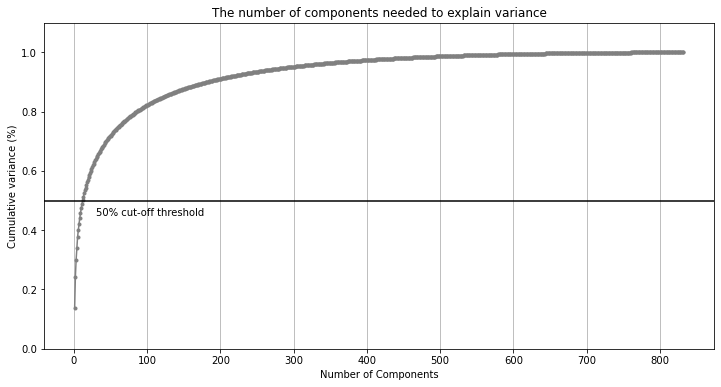

In [17]:
pca = PCA().fit(features_array)

import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 833, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='.', linestyle='-', color='gray')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 900, step=100)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
#plt.yticks(np.arange(0, 2892, step=100))
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.5, color='black', linestyle='-')
plt.text(30, 0.45, '50% cut-off threshold', color = 'black', fontsize=10)

ax.grid(axis='x')
plt.show()

In [6]:
y

array([0.13665067, 0.24148079, 0.29862067, 0.33977103, 0.3765762 ,
       0.40051762, 0.42157501, 0.44059414, 0.45838404, 0.4738386 ,
       0.48791001, 0.50054454, 0.51252449, 0.5238371 , 0.5342327 ,
       0.54383613, 0.55303169, 0.56194015, 0.57052825, 0.57842224,
       0.58591014, 0.59293908, 0.59982375, 0.60651106, 0.61278623,
       0.61897302, 0.62484684, 0.63043915, 0.63578965, 0.64103087,
       0.64602837, 0.65079967, 0.6554611 , 0.65998968, 0.66439959,
       0.66868721, 0.67291785, 0.67702298, 0.68100028, 0.6848969 ,
       0.68871632, 0.69242018, 0.69603813, 0.6995432 , 0.70297822,
       0.7063179 , 0.70963531, 0.71288877, 0.71601664, 0.71911209,
       0.72213442, 0.72509681, 0.7279955 , 0.73080862, 0.73358172,
       0.73632207, 0.73900246, 0.74161168, 0.74421627, 0.74675846,
       0.74924314, 0.75169729, 0.75408481, 0.75645327, 0.75877298,
       0.761066  , 0.76334013, 0.76559329, 0.7677673 , 0.76989593,
       0.77198106, 0.77405322, 0.7761002 , 0.77810938, 0.78009

In [7]:
#apply PCA to transform this matrix for quicker computation - 10 principal compunent
pca_breast = PCA(n_components=10)
new_data = pca_breast.fit_transform(features_array)

#analyze the number of ADR per drug
count_of_SE = list(side_effect_df.sum(axis = 0))

In [5]:
mean(count_of_SE)

42.74729241877257

In [6]:
import statistics
statistics.median(count_of_SE)

8

In [7]:
len(count_of_SE)

1385

693 [0, 1, 2, 3, 4, 6, 8, 11, 13, 16, 19, 20, 22, 24, 26, 27, 28, 29, 30, 32, 35, 36, 37, 38, 40, 41, 42, 46, 47, 49, 51, 52, 53, 57, 59, 60, 61, 62, 63, 65, 66, 67, 68, 70, 72, 74, 76, 78, 79, 81, 82, 83, 84, 85, 86, 87, 88, 95, 98, 99, 100, 108, 110, 113, 115, 117, 118, 119, 120, 121, 123, 124, 127, 129, 130, 133, 137, 140, 141, 142, 144, 145, 150, 151, 152, 153, 154, 155, 157, 158, 166, 169, 170, 173, 174, 176, 177, 178, 179, 180, 181, 182, 185, 186, 187, 189, 194, 195, 198, 199, 201, 202, 203, 204, 205, 207, 208, 209, 210, 211, 212, 213, 217, 224, 225, 226, 227, 229, 230, 231, 233, 234, 236, 238, 239, 240, 241, 243, 244, 246, 249, 250, 251, 256, 258, 260, 261, 262, 263, 266, 267, 269, 270, 274, 275, 277, 278, 281, 283, 285, 286, 288, 289, 292, 295, 296, 297, 298, 300, 302, 305, 308, 309, 310, 311, 313, 316, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 332, 333, 335, 336, 338, 341, 342, 343, 344, 345, 346, 349, 350, 352, 353, 354, 355, 356, 359, 360, 364, 365, 366, 367, 368, 36

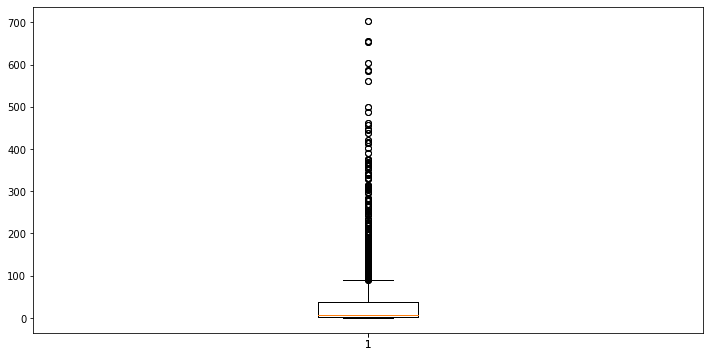

In [8]:
#import the data needed from 'Liu_dataset.mat'
#where we'll have side_effect, chemical, Targets, Transporters, Enzymes, Pathways, Treatment as attributes

data_set = loadmat("Liu_dataset.mat")

side_effect = data_set['side_effect']
chemical = data_set['chemical']
Targets = data_set['Targets']
Transporters = data_set['Transporters']
Enzymes = data_set['Enzymes']
Pathways = data_set['Pathways']
Treatment = data_set['Treatment']
Other_side_effects = data_set['Other_side_effects']

side_effect_df = pd.DataFrame(data = side_effect)
chemical_df = pd.DataFrame(data = chemical)
Targets_df = pd.DataFrame(data = Targets)
Transporters_df = pd.DataFrame(data = Transporters)
Enzymes_df = pd.DataFrame(data = Enzymes)
Pathways_df = pd.DataFrame(data = Pathways)
Treatment_df = pd.DataFrame(data = Treatment)

features = pd.concat([chemical_df, Targets_df, Transporters_df, Enzymes_df, Pathways_df, Treatment_df], axis=1)
features.columns=[str(i) for i in range(1, 2893)]
features_array = features.to_numpy()

#apply PCA to transform this matrix for quicker computation - 10 principal compunent
pca_breast = PCA(n_components=10)
new_data = pca_breast.fit_transform(features_array)

#analyze the number of ADR per drug
count_of_SE = list(side_effect_df.sum(axis = 0))
count_of_SE_df = pd.DataFrame(data = count_of_SE)
count_of_SE_df = count_of_SE_df.T
Count = pd.concat([side_effect_df, count_of_SE_df], axis=0)
index = 0
count = 0
list_of_index = []
for i in count_of_SE:
    if i>7:
        count+=1
        list_of_index.append(index)
    index+=1
print (count, list_of_index)
plt.boxplot(count_of_SE, notch=None, vert=None, patch_artist=None, widths=None)

count_of_SEnosmote = list(side_effect_df.sum(axis = 0))
count_of_SE_dfnosmote = pd.DataFrame(data = count_of_SEnosmote)
count_of_SE_dfnosmote = count_of_SE_dfnosmote.T
Count = pd.concat([side_effect_df, count_of_SE_dfnosmote], axis=0)
index = 0
count = 0
list_of_indexnosmote = []
for i in count_of_SEnosmote:
    if i>250:
        count+=1
        list_of_indexnosmote.append(index)
    index+=1
print (count, list_of_indexnosmote)
plt.boxplot(count_of_SEnosmote, notch=None, vert=None, patch_artist=None, widths=None)
count_of_SE_dfnosmote

drug_to_SE_matrix = pandas.read_csv('drug_to_SE_matrix.csv')
drug_to_SE_matrix = drug_to_SE_matrix.drop(['Unnamed: 0'], axis = 1)

G_drug_SE = nx.Graph()
G_drug_SE.add_nodes_from(drug_to_SE_matrix['drug'], bipartite='drug')
G_drug_SE.add_nodes_from(drug_to_SE_matrix['SE'], bipartite='SE')
G_drug_SE.add_edges_from(zip(drug_to_SE_matrix['drug'], drug_to_SE_matrix['SE'])) 
N, K = G_drug_SE.order(), G_drug_SE.size()
avg_deg = float(K) / N
print ("Nodes: ", N)
print ("Edges: ", K)
print ("Average degree: ", avg_deg)
drug_nodes = [n for n in G_drug_SE.nodes() if G_drug_SE.nodes[n]['bipartite'] == 'drug'] 
SE_nodes = [n for n in G_drug_SE.nodes() if G_drug_SE.nodes[n]['bipartite'] == 'SE'] 
G_drug_on_SE = nx.algorithms.bipartite.projection.weighted_projected_graph(G_drug_SE, drug_nodes)
N, K = G_drug_on_SE.order(), G_drug_on_SE.size()
avg_deg = float(K) / N
print ("Nodes: ", N)
print ("Edges: ", K)
print ("Average degree: ", avg_deg)

In [ ]:
G_drug_on_SE

In [23]:
density = nx.density(G_drug_on_SE)
print("Network density:", density)

Network density: 0.9627129038230121


In [26]:
nx.diameter(G_drug_on_SE)

2

In [28]:
from networkx.algorithms import community
communities = community.greedy_modularity_communities(G_drug_on_SE)

In [36]:
print(nx.average_shortest_path_length(G_drug_on_SE))

1.0372870961769878


In [37]:
print(nx.average_clustering(G_drug_on_SE))

0.9790800208865706


In [22]:
print(nx.info(G_drug_on_SE))

Name: 
Type: Graph
Number of nodes: 832
Number of edges: 332806
Average degree: 800.0144


In [38]:
gephi = pandas.read_csv('gephidata.csv')

In [39]:
gephi

,id,degree,eccentricity,closnesscentrality,harmonicclosnesscentrality,betweenesscentrality,weighteddegree,authority,hub,clustering,triangles,eigencentrality
0,0,825,2,0.992832,0.996390,0.000064,18145,0.035499,0.035499,0.972771,330645,0.997916
1,1,825,2,0.992832,0.996390,0.000058,26623,0.035488,0.035488,0.972154,330435,0.997607
2,2,798,2,0.961806,0.980144,0.000018,8668,0.034595,0.034595,0.987730,314101,0.972423
3,3,813,2,0.978799,0.989170,0.000026,11655,0.035167,0.035167,0.983152,324517,0.988531
4,4,818,2,0.984597,0.992178,0.000064,17015,0.035227,0.035227,0.974446,325614,0.990255
...,...,...,...,...,...,...,...,...,...,...,...,...
827,827,65,2,0.520351,0.539110,0.000002,72,0.002748,0.002748,0.975000,2028,0.077268
828,828,827,2,0.995210,0.997593,0.000062,24413,0.035542,0.035542,0.970388,331437,0.999140
829,829,814,2,0.979953,0.989771,0.000032,11894,0.035173,0.035173,0.981078,324630,0.988711
830,830,820,2,0.986936,0.993381,0.000034,15237,0.035396,0.035396,0.979002,328739,0.994980


In [40]:
gephi_weighteddegree = gephi['weighteddegree']
gephi_eigencentrality = gephi['eigencentrality']
gephi_closeness = gephi['closnesscentrality']
gephi_clustering = gephi['clustering']
gephi_betweeness = gephi['betweenesscentrality']

In [41]:
gephi_weighteddegree = list(gephi_weighteddegree)
amin, amax = min(gephi_weighteddegree), max(gephi_weighteddegree)
for i, val in enumerate(gephi_weighteddegree):
    gephi_weighteddegree[i] = (val-amin) / (amax-amin)

In [42]:
gephi_eigencentrality = list(gephi_eigencentrality)
amin, amax = min(gephi_eigencentrality), max(gephi_eigencentrality)
for i, val in enumerate(gephi_eigencentrality):
    gephi_eigencentrality[i] = (val-amin) / (amax-amin)

In [43]:
gephi_closeness = list(gephi_closeness)
amin, amax = min(gephi_closeness), max(gephi_closeness)
for i, val in enumerate(gephi_closeness):
    gephi_closeness[i] = (val-amin) / (amax-amin)

In [44]:
gephi_clustering = list(gephi_clustering)
amin, amax = min(gephi_clustering), max(gephi_clustering)
for i, val in enumerate(gephi_clustering):
    gephi_clustering[i] = (val-amin) / (amax-amin)

In [45]:
gephi_betweeness = list(gephi_betweeness)
amin, amax = min(gephi_betweeness), max(gephi_betweeness)
for i, val in enumerate(gephi_betweeness):
    gephi_betweeness[i] = (val-amin) / (amax-amin)

In [46]:
fewturs_centrality['degree_centrality'] = gephi_weighteddegree
fewturs_centrality['eigenvector_centrality'] = gephi_eigencentrality
fewturs_centrality['closeness_centrality'] = gephi_closeness
fewturs_centrality['clustering'] = gephi_clustering
fewturs_centrality['betweeness'] = gephi_betweeness

NameError: name 'fewturs_centrality' is not defined

In [47]:
fewturs_centrality

NameError: name 'fewturs_centrality' is not defined

In [21]:
len(list_of_index)

779

In [22]:
len(list_of_indexnosmote)

58

In [46]:
from sklearn.ensemble import RandomForestClassifier
import math
model = RandomForestClassifier()
over = SMOTE(sampling_strategy=0.43)
#under = RandomUnderSampler(sampling_strategy=1)
#steps = [('over', over), ('under', under), ('model', model)]
steps = [('over', over), ('model', model)]
pipeline = Pipeline(steps=steps)
steps2 = [('model', model)]
pipeline2 = Pipeline(steps=steps2)
score = 0
list_of_ADRID_greater_than_90 = []
for i in list_of_index:
    if i not in list_of_indexnosmote:
        side_effect_1 = side_effect_df[i]
        side_effect_1_array = side_effect_1.to_numpy()
        cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
        scores = cross_val_score(pipeline, fewturs_centrality, side_effect_1_array, scoring='roc_auc', cv=cv, n_jobs=-1)
        print(i, 'Mean ROC AUC: %.3f' % mean(scores))
        if math.isnan(mean(scores)):
            break
    else:
        side_effect_1 = side_effect_df[i]
        side_effect_1_array = side_effect_1.to_numpy()
        cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
        scores = cross_val_score(pipeline2, fewturs_centrality, side_effect_1_array, scoring='roc_auc', cv=cv, n_jobs=-1)
        print(i, 'Mean ROC AUC: %.3f' % mean(scores))
    if mean(scores)> 0.9:
        list_of_ADRID_greater_than_90.append(i)
    score += mean(scores)
    
print (i, score/693)
print (len(list_of_ADRID_greater_than_90), list_of_ADRID_greater_than_90)

0 Mean ROC AUC: 0.578
1 Mean ROC AUC: 0.777
2 Mean ROC AUC: 0.858
3 Mean ROC AUC: 0.776
4 Mean ROC AUC: 0.510
6 Mean ROC AUC: 0.894
8 Mean ROC AUC: 0.698
11 Mean ROC AUC: 0.771
13 Mean ROC AUC: 0.792
16 Mean ROC AUC: 0.651
19 Mean ROC AUC: 0.789
20 Mean ROC AUC: 0.833
22 Mean ROC AUC: 0.614
24 Mean ROC AUC: 0.929
26 Mean ROC AUC: 0.734
27 Mean ROC AUC: 0.854
28 Mean ROC AUC: 0.476
29 Mean ROC AUC: 0.867
30 Mean ROC AUC: 0.788
32 Mean ROC AUC: 0.901
35 Mean ROC AUC: 0.711
36 Mean ROC AUC: 0.843
37 Mean ROC AUC: 0.823
38 Mean ROC AUC: 0.775
40 Mean ROC AUC: 0.866
41 Mean ROC AUC: 0.570
42 Mean ROC AUC: 0.652
46 Mean ROC AUC: 0.852
47 Mean ROC AUC: 0.841
49 Mean ROC AUC: 0.751
51 Mean ROC AUC: 0.847
52 Mean ROC AUC: 0.778
53 Mean ROC AUC: 0.852
57 Mean ROC AUC: 0.841
59 Mean ROC AUC: 0.723
60 Mean ROC AUC: 0.872
61 Mean ROC AUC: 0.873
62 Mean ROC AUC: 0.785
63 Mean ROC AUC: 0.784
65 Mean ROC AUC: 0.533
66 Mean ROC AUC: 0.765
67 Mean ROC AUC: 0.886
68 Mean ROC AUC: 0.864
70 Mean ROC AUC: 0

618 Mean ROC AUC: 0.844
619 Mean ROC AUC: 0.805
621 Mean ROC AUC: 0.926
623 Mean ROC AUC: 0.670
624 Mean ROC AUC: 0.855
625 Mean ROC AUC: 0.798
626 Mean ROC AUC: 0.830
629 Mean ROC AUC: 0.906
630 Mean ROC AUC: 0.565
631 Mean ROC AUC: 0.684
633 Mean ROC AUC: 0.920
636 Mean ROC AUC: 0.765
640 Mean ROC AUC: 0.870
642 Mean ROC AUC: 0.903
644 Mean ROC AUC: 0.805
645 Mean ROC AUC: 0.912
646 Mean ROC AUC: 0.892
647 Mean ROC AUC: 0.841
648 Mean ROC AUC: 0.854
649 Mean ROC AUC: 0.799
650 Mean ROC AUC: 0.765
651 Mean ROC AUC: 0.850
653 Mean ROC AUC: 0.866
654 Mean ROC AUC: 0.799
657 Mean ROC AUC: 0.793
659 Mean ROC AUC: 0.872
661 Mean ROC AUC: 0.765
663 Mean ROC AUC: 0.683
664 Mean ROC AUC: 0.862
670 Mean ROC AUC: 0.829
671 Mean ROC AUC: 0.832
673 Mean ROC AUC: 0.799
677 Mean ROC AUC: 0.856
678 Mean ROC AUC: 0.782
680 Mean ROC AUC: 0.875
682 Mean ROC AUC: 0.880
684 Mean ROC AUC: 0.794
685 Mean ROC AUC: 0.779
686 Mean ROC AUC: 0.884
687 Mean ROC AUC: 0.814
688 Mean ROC AUC: 0.838
691 Mean ROC AUC

1362 Mean ROC AUC: 0.623
1366 Mean ROC AUC: 0.843
1367 Mean ROC AUC: 0.784
1369 Mean ROC AUC: 0.736
1370 Mean ROC AUC: 0.831
1371 Mean ROC AUC: 0.607
1372 Mean ROC AUC: 0.882
1375 Mean ROC AUC: 0.824
1378 Mean ROC AUC: 0.823
1379 Mean ROC AUC: 0.801
1380 Mean ROC AUC: 0.619
1382 Mean ROC AUC: 0.740
1382 0.7904418602148368
44 [24, 32, 70, 88, 115, 118, 133, 177, 179, 195, 204, 212, 226, 244, 274, 275, 283, 286, 322, 326, 368, 371, 390, 480, 541, 564, 594, 621, 629, 633, 642, 645, 746, 753, 803, 951, 961, 971, 1052, 1058, 1078, 1084, 1144, 1354]


In [32]:
count_of_SEnosmote

[54,
 85,
 457,
 21,
 9,
 2,
 63,
 1,
 61,
 6,
 3,
 27,
 7,
 11,
 1,
 1,
 13,
 1,
 1,
 228,
 77,
 2,
 8,
 1,
 15,
 5,
 13,
 314,
 15,
 87,
 77,
 1,
 131,
 4,
 6,
 277,
 339,
 129,
 152,
 2,
 33,
 9,
 15,
 1,
 0,
 2,
 13,
 187,
 1,
 263,
 4,
 421,
 12,
 339,
 3,
 1,
 5,
 48,
 5,
 88,
 8,
 9,
 11,
 281,
 5,
 8,
 11,
 355,
 158,
 1,
 22,
 1,
 36,
 1,
 360,
 5,
 181,
 1,
 185,
 27,
 4,
 134,
 25,
 70,
 299,
 8,
 33,
 11,
 10,
 6,
 1,
 4,
 1,
 2,
 3,
 55,
 6,
 5,
 8,
 39,
 60,
 1,
 3,
 1,
 2,
 2,
 1,
 1,
 64,
 5,
 161,
 2,
 7,
 189,
 2,
 12,
 1,
 45,
 48,
 23,
 56,
 93,
 7,
 61,
 49,
 1,
 1,
 39,
 1,
 15,
 9,
 1,
 1,
 17,
 1,
 1,
 1,
 75,
 2,
 4,
 34,
 26,
 35,
 1,
 33,
 101,
 4,
 4,
 4,
 3,
 330,
 9,
 10,
 8,
 9,
 14,
 2,
 52,
 58,
 3,
 1,
 3,
 5,
 1,
 4,
 1,
 8,
 3,
 3,
 119,
 15,
 6,
 1,
 121,
 15,
 5,
 368,
 226,
 83,
 444,
 58,
 13,
 173,
 2,
 3,
 17,
 16,
 41,
 1,
 352,
 6,
 2,
 4,
 1,
 115,
 64,
 5,
 1,
 88,
 162,
 3,
 183,
 150,
 79,
 31,
 36,
 1,
 191,
 153,
 27,
 23,
 101,
 40,
 8

In [31]:
len(list_of_indexnosmote)

58

In [34]:
side_effect_df[9]

0      0
1      0
2      0
3      0
4      0
      ..
827    0
828    0
829    0
830    0
831    0
Name: 9, Length: 832, dtype: uint8

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import math
model = RandomForestClassifier()
over = SMOTE(sampling_strategy=0.43)
#under = RandomUnderSampler(sampling_strategy=1)
#steps = [('over', over), ('under', under), ('model', model)]
steps = [('over', over), ('model', model)]
pipeline = Pipeline(steps=steps)
steps2 = [('model', model)]
pipeline2 = Pipeline(steps=steps2)
score = 0
list_of_ADRID_greater_than_90 = []
for i in list_of_index:
    if i not in list_of_indexnosmote:
        side_effect_1 = side_effect_df[i]
        side_effect_1_array = side_effect_1.to_numpy()
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        scores = cross_val_score(pipeline, fewturs_centrality, side_effect_1_array, scoring='roc_auc', cv=cv, n_jobs=-1)
        print(i, 'Mean ROC AUC: %.3f' % mean(scores))
        if math.isnan(mean(scores)):
            break
    else:
        side_effect_1 = side_effect_df[i]
        side_effect_1_array = side_effect_1.to_numpy()
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        scores = cross_val_score(pipeline2, fewturs_centrality, side_effect_1_array, scoring='roc_auc', cv=cv, n_jobs=-1)
        print(i, 'Mean ROC AUC: %.3f' % mean(scores))
    if mean(scores)> 0.9:
        list_of_ADRID_greater_than_90.append(i)
    score += mean(scores)
    
print (i, score/519)
print (len(list_of_ADRID_greater_than_90), list_of_ADRID_greater_than_90)

In [48]:
gephi = pandas.read_csv('gephidata.csv')
gephi_weighteddegree = list(gephi['weighteddegree'])
gephi_eigencentrality = list(gephi['eigencentrality'])
gephi_closeness = list(gephi['closnesscentrality'])
gephi_clustering = list(gephi['clustering'])
gephi_betweeness = list(gephi['betweenesscentrality'])

from sklearn import preprocessing
gephi_weighteddegree_standardized = preprocessing.scale(gephi_weighteddegree)
gephi_eigencentrality_standardized = preprocessing.scale(gephi_eigencentrality)
gephi_closeness_standardized = preprocessing.scale(gephi_closeness)
gephi_clustering_standardized = preprocessing.scale(gephi_clustering)
gephi_betweeness_standardized = preprocessing.scale(gephi_betweeness)

fewturs_centrality = pd.DataFrame(data=new_data)
fewturs_centrality['degree_centrality'] = gephi_weighteddegree_standardized
fewturs_centrality['eigenvector_centrality'] = gephi_eigencentrality_standardized
fewturs_centrality['closeness_centrality'] = gephi_closeness_standardized
fewturs_centrality['clustering'] = gephi_clustering_standardized
fewturs_centrality['betweeness'] = gephi_betweeness_standardized
fewturs_centrality

,0,1,2,3,4,5,6,7,8,9,degree_centrality,eigenvector_centrality,closeness_centrality,clustering,betweeness
0,2.243359,-3.243750,0.464371,-0.784689,2.527044,0.005420,1.157392,1.715334,0.222580,-1.761309,0.259820,0.312140,0.429199,-0.795427,0.621922
1,0.183050,-1.580306,-0.378155,-0.468503,3.314509,-1.100962,1.758884,-1.381765,-0.229715,0.879219,1.109171,0.308608,0.429199,-0.873217,0.426170
2,2.250186,1.692000,-2.770572,0.813523,0.960965,-0.954894,-1.495280,-0.871223,0.323246,-0.495994,-0.689614,0.020693,-0.123419,1.090575,-0.878848
3,-1.099856,5.468633,4.742379,-0.996116,-0.248932,0.069367,0.559478,-1.393525,1.114313,-0.234236,-0.390368,0.204847,0.179251,0.513389,-0.617844
4,-0.373342,-3.386503,-0.653787,0.375001,-0.013736,0.092307,1.576823,-1.227479,-0.536423,1.660932,0.146613,0.224556,0.282522,-0.584246,0.621922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,-0.573835,-3.580396,-0.987106,-1.924037,-2.584534,2.174678,-0.346405,-0.355430,-0.294488,0.785794,-1.550787,-10.213112,-7.986375,-0.514399,-1.400855
828,2.867740,-2.913638,0.912123,0.205159,1.212399,-0.735323,-2.485073,-0.192150,0.366802,-1.752545,0.887767,0.326134,0.471555,-1.095871,0.556672
829,3.570952,3.609016,-2.051076,1.711572,-2.500299,-0.340653,1.092487,-0.911603,3.378448,0.661791,-0.366424,0.206905,0.199806,0.251903,-0.422092
830,-0.507310,-3.619974,-1.414899,2.320922,-0.723544,1.959670,-0.222637,-0.815397,1.744260,0.746524,-0.031512,0.278575,0.324183,-0.009835,-0.356841


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import math
model = RandomForestClassifier()
over = SMOTE(sampling_strategy=0.43)
#under = RandomUnderSampler(sampling_strategy=1)
#steps = [('over', over), ('under', under), ('model', model)]
steps = [('over', over), ('model', model)]
pipeline = Pipeline(steps=steps)
steps2 = [('model', model)]
pipeline2 = Pipeline(steps=steps2)
score = 0
list_of_ADRID_greater_than_90 = []
for i in list_of_index:
    if i not in list_of_indexnosmote:
        side_effect_1 = side_effect_df[i]
        side_effect_1_array = side_effect_1.to_numpy()
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        scores = cross_val_score(pipeline, fewturs_centrality, side_effect_1_array, scoring='roc_auc', cv=cv, n_jobs=-1)
        print(i, 'Mean ROC AUC: %.3f' % mean(scores))
        if math.isnan(mean(scores)):
            break
    else:
        side_effect_1 = side_effect_df[i]
        side_effect_1_array = side_effect_1.to_numpy()
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        scores = cross_val_score(pipeline2, fewturs_centrality, side_effect_1_array, scoring='roc_auc', cv=cv, n_jobs=-1)
        print(i, 'Mean ROC AUC: %.3f' % mean(scores))
    if mean(scores)> 0.9:
        list_of_ADRID_greater_than_90.append(i)
    score += mean(scores)
    
print (i, score/519)
print (len(list_of_ADRID_greater_than_90), list_of_ADRID_greater_than_90)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import math
import pandas as pd
feature_names = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
model = RandomForestClassifier()
over = SMOTE(sampling_strategy=0.43)
#under = RandomUnderSampler(sampling_strategy=1)
#steps = [('over', over), ('under', under), ('model', model)]
steps = [('over', over), ('model', model)]
pipeline = Pipeline(steps=steps)
steps2 = [('model', model)]
pipeline2 = Pipeline(steps=steps2)
score = 0
list_of_ADRID_greater_than_90 = [32, 70, 118, 119, 133, 177, 179, 195, 204, 212, 226, 240, 244, 274, 275, 283, 322, 326, 371, 480, 541, 558, 564, 594, 642, 645, 734, 753, 812, 854, 878, 933, 951, 961, 1052, 1058, 1082, 1354]
feature_importance = 0
for i in list_of_ADRID_greater_than_90:
    if i not in list_of_indexnosmote:
        side_effect_1 = side_effect_df[i]
        side_effect_1_array = side_effect_1.to_numpy()
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        scores = cross_val_score(pipeline, fewturs_centrality, side_effect_1_array, scoring='roc_auc', cv=cv, n_jobs=-1)
        print(i, 'Mean ROC AUC: %.3f' % mean(scores))
        if math.isnan(mean(scores)):
            break
    else:
        side_effect_1 = side_effect_df[i]
        side_effect_1_array = side_effect_1.to_numpy()
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        scores = cross_val_score(pipeline2, fewturs_centrality, side_effect_1_array, scoring='roc_auc', cv=cv, n_jobs=-1)
        print(i, 'Mean ROC AUC: %.3f' % mean(scores))
    score += mean(scores)
    X_train, X_test, y_train, y_test = train_test_split(fewturs_centrality, side_effect_1_array, test_size=0.3)
    rf = RandomForestRegressor(n_estimators=100)
    rf.fit(X_train, y_train)
    feature_importance += rf.feature_importances_
print (feature_importance/38)
plt.bar(range(15), feature_importance/38)

In [49]:
fewturs_centrality

,0,1,2,3,4,5,6,7,8,9,degree_centrality,eigenvector_centrality,closeness_centrality,clustering,betweeness
0,2.243359,-3.243750,0.464371,-0.784689,2.527044,0.005420,1.157392,1.715334,0.222580,-1.761309,0.259820,0.312140,0.429199,-0.795427,0.621922
1,0.183050,-1.580306,-0.378155,-0.468503,3.314509,-1.100962,1.758884,-1.381765,-0.229715,0.879219,1.109171,0.308608,0.429199,-0.873217,0.426170
2,2.250186,1.692000,-2.770572,0.813523,0.960965,-0.954894,-1.495280,-0.871223,0.323246,-0.495994,-0.689614,0.020693,-0.123419,1.090575,-0.878848
3,-1.099856,5.468633,4.742379,-0.996116,-0.248932,0.069367,0.559478,-1.393525,1.114313,-0.234236,-0.390368,0.204847,0.179251,0.513389,-0.617844
4,-0.373342,-3.386503,-0.653787,0.375001,-0.013736,0.092307,1.576823,-1.227479,-0.536423,1.660932,0.146613,0.224556,0.282522,-0.584246,0.621922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,-0.573835,-3.580396,-0.987106,-1.924037,-2.584534,2.174678,-0.346405,-0.355430,-0.294488,0.785794,-1.550787,-10.213112,-7.986375,-0.514399,-1.400855
828,2.867740,-2.913638,0.912123,0.205159,1.212399,-0.735323,-2.485073,-0.192150,0.366802,-1.752545,0.887767,0.326134,0.471555,-1.095871,0.556672
829,3.570952,3.609016,-2.051076,1.711572,-2.500299,-0.340653,1.092487,-0.911603,3.378448,0.661791,-0.366424,0.206905,0.199806,0.251903,-0.422092
830,-0.507310,-3.619974,-1.414899,2.320922,-0.723544,1.959670,-0.222637,-0.815397,1.744260,0.746524,-0.031512,0.278575,0.324183,-0.009835,-0.356841


In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import math
model = GradientBoostingClassifier()
over = SMOTE(sampling_strategy=0.43)
#under = RandomUnderSampler(sampling_strategy=1)
#steps = [('over', over), ('under', under), ('model', model)]
steps = [('over', over), ('model', model)]
pipeline = Pipeline(steps=steps)
steps2 = [('model', model)]
pipeline2 = Pipeline(steps=steps2)
score = 0
list_of_ADRID_greater_than_90 = []
for i in list_of_index:
    if i not in list_of_indexnosmote:
        side_effect_1 = side_effect_df[i]
        side_effect_1_array = side_effect_1.to_numpy()
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        scores = cross_val_score(pipeline, fewturs_centrality, side_effect_1_array, scoring='roc_auc', cv=cv, n_jobs=-1)
        print(i, 'Mean ROC AUC: %.3f' % mean(scores))
        if math.isnan(mean(scores)):
            break
    else:
        side_effect_1 = side_effect_df[i]
        side_effect_1_array = side_effect_1.to_numpy()
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        scores = cross_val_score(pipeline2, fewturs_centrality, side_effect_1_array, scoring='roc_auc', cv=cv, n_jobs=-1)
        print(i, 'Mean ROC AUC: %.3f' % mean(scores))
    if mean(scores)> 0.9:
        list_of_ADRID_greater_than_90.append(i)
    score += mean(scores)
    
print (i, score/519)
print (len(list_of_ADRID_greater_than_90), list_of_ADRID_greater_than_90)

In [ ]:
import math
model = DecisionTreeClassifier()
over = SMOTE(sampling_strategy=0.43)
#under = RandomUnderSampler(sampling_strategy=1)
#steps = [('over', over), ('under', under), ('model', model)]
steps = [('over', over), ('model', model)]
pipeline = Pipeline(steps=steps)
steps2 = [('model', model)]
pipeline2 = Pipeline(steps=steps2)
score = 0
list_of_ADRID_greater_than_90 = []
for i in list_of_index:
    if i not in list_of_indexnosmote:
        side_effect_1 = side_effect_df[i]
        side_effect_1_array = side_effect_1.to_numpy()
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        scores = cross_val_score(pipeline, fewturs_centrality, side_effect_1_array, scoring='roc_auc', cv=cv, n_jobs=-1)
        scores = cross_val_score(pipeline, fewturs_centrality, side_effect_1_array, scoring='acc', cv=cv, n_jobs=-1)
        print(i, 'Mean ROC AUC: %.3f' % mean(scores))
        if math.isnan(mean(scores)):
            break
    else:
        side_effect_1 = side_effect_df[i]
        side_effect_1_array = side_effect_1.to_numpy()
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        scores = cross_val_score(pipeline2, fewturs_centrality, side_effect_1_array, scoring='roc_auc', cv=cv, n_jobs=-1)
        print(i, 'Mean ROC AUC: %.3f' % mean(scores))
    if mean(scores)> 0.9:
        list_of_ADRID_greater_than_90.append(i)
    score += mean(scores)
    
print (i, score/519)
print (len(list_of_ADRID_greater_than_90), list_of_ADRID_greater_than_90)

In [ ]:
import math
model = SVC(kernel="rbf", C=0.025, probability=True)
over = SMOTE(sampling_strategy=0.43)
#under = RandomUnderSampler(sampling_strategy=1)
#steps = [('over', over), ('under', under), ('model', model)]
steps = [('over', over), ('model', model)]
pipeline = Pipeline(steps=steps)
steps2 = [('model', model)]
pipeline2 = Pipeline(steps=steps2)
score = 0
list_of_ADRID_greater_than_90 = []
for i in list_of_index:
    if i not in list_of_indexnosmote:
        side_effect_1 = side_effect_df[i]
        side_effect_1_array = side_effect_1.to_numpy()
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        scores = cross_val_score(pipeline, fewturs_centrality, side_effect_1_array, scoring='roc_auc', cv=cv, n_jobs=-1)
        print(i, 'Mean ROC AUC: %.3f' % mean(scores))
        if math.isnan(mean(scores)):
            break
    else:
        side_effect_1 = side_effect_df[i]
        side_effect_1_array = side_effect_1.to_numpy()
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        scores = cross_val_score(pipeline2, fewturs_centrality, side_effect_1_array, scoring='roc_auc', cv=cv, n_jobs=-1)
        print(i, 'Mean ROC AUC: %.3f' % mean(scores))
    if mean(scores)> 0.9:
        list_of_ADRID_greater_than_90.append(i)
    score += mean(scores)
    
print (i, score/519)
print (len(list_of_ADRID_greater_than_90), list_of_ADRID_greater_than_90)

In [ ]:
import math
model = KNeighborsClassifier(3)
over = SMOTE(sampling_strategy=0.43)
#under = RandomUnderSampler(sampling_strategy=1)
#steps = [('over', over), ('under', under), ('model', model)]
steps = [('over', over), ('model', model)]
pipeline = Pipeline(steps=steps)
steps2 = [('model', model)]
pipeline2 = Pipeline(steps=steps2)
score = 0
list_of_ADRID_greater_than_90 = []
for i in list_of_index:
    if i not in list_of_indexnosmote:
        side_effect_1 = side_effect_df[i]
        side_effect_1_array = side_effect_1.to_numpy()
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        scores = cross_val_score(pipeline, fewturs_centrality, side_effect_1_array, scoring='roc_auc', cv=cv, n_jobs=-1)
        print(i, 'Mean ROC AUC: %.3f' % mean(scores))
        if math.isnan(mean(scores)):
            break
    else:
        side_effect_1 = side_effect_df[i]
        side_effect_1_array = side_effect_1.to_numpy()
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        scores = cross_val_score(pipeline2, fewturs_centrality, side_effect_1_array, scoring='roc_auc', cv=cv, n_jobs=-1)
        print(i, 'Mean ROC AUC: %.3f' % mean(scores))
    if mean(scores)> 0.9:
        list_of_ADRID_greater_than_90.append(i)
    score += mean(scores)
    
print (i, score/519)
print (len(list_of_ADRID_greater_than_90), list_of_ADRID_greater_than_90)

In [ ]:
#delete
test_AUC = 0
for i in list_of_index:
    side_effect_1 = side_effect_df[i]
    X = fewturs_centrality
    y = side_effect_1
    X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.30,random_state=0)
    model = Sequential()
    model.add(Dense(12, input_dim=15, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC'])
    # patient early stopping
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
    # fit model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0, callbacks=[es])

    # evaluate the model
    _, train_acc = model.evaluate(X_train, y_train, verbose=0)
    _, test_acc = model.evaluate(X_test, y_test, verbose=0)
    test_AUC += test_acc
    print (test_acc)
print (test_AUC/519)

In [ ]:
mean_test_AUC = 0
mean_test_acc = 0
list_of_i_greater_than_90 = []
list_of_i_greater_than_88 = []
list_of_i_greater_than_85 = []
list_of_i_greater_than_80 = []
list_of_i_greater_than_90_acc = []
list_of_i_greater_than_88_acc = []
list_of_i_greater_than_85_acc = []
list_of_i_greater_than_80_acc = []
for i in list_of_index:
    side_effect_1 = side_effect_df[i]
    X = fewturs_centrality
    y = side_effect_1
    X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.30,random_state=0)
    model = Sequential()
    model.add(Dense(12, input_dim=14, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC','acc'])
    # patient early stopping
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
    # fit model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0, callbacks=[es])

    # evaluate the model
    _, train_AUC, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
    _, test_AUC, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    mean_test_AUC += test_AUC
    mean_test_acc += test_accuracy
    if test_AUC>0.8:
        list_of_i_greater_than_80.append(i)
    if test_AUC>0.85:
        list_of_i_greater_than_85.append(i)
    if test_AUC>0.88:
        list_of_i_greater_than_88.append(i)
    if test_AUC>0.90:
        list_of_i_greater_than_90.append(i)
    if test_accuracy>0.8:
        list_of_i_greater_than_80_acc.append(i)
    if test_accuracy>0.85:
        list_of_i_greater_than_85_acc.append(i)
    if test_accuracy>0.88:
        list_of_i_greater_than_88_acc.append(i)
    if test_accuracy>0.90:
        list_of_i_greater_than_90_acc.append(i)
    print ('DRUG:',i, test_AUC, test_accuracy)
print (len(list_of_i_greater_than_80), list_of_i_greater_than_80)
print (len(list_of_i_greater_than_85), list_of_i_greater_than_85)
print (len(list_of_i_greater_than_88), list_of_i_greater_than_88)
print (len(list_of_i_greater_than_90), list_of_i_greater_than_90)
print (len(list_of_i_greater_than_80_acc), list_of_i_greater_than_80_acc)
print (len(list_of_i_greater_than_85_acc), list_of_i_greater_than_85_acc)
print (len(list_of_i_greater_than_88_acc), list_of_i_greater_than_88_acc)
print (len(list_of_i_greater_than_90_acc), list_of_i_greater_than_90_acc)
print (mean_test_AUC/519, mean_test_acc/519)

In [ ]:
for e in G_drug_on_SE.edges():
    if G_drug_on_SE[e[0]][e[1]]['weight'] < 0.01:
        G_drug_on_SE.remove_edge(*e)

degree_centrality = nx.algorithms.centrality.degree_centrality(G_drug_on_SE)
degree_centrality_sorted = {key:degree_centrality[key] for key in sorted(degree_centrality.keys())}
degree_centrality_sorted_value = degree_centrality_sorted.values()
degree_centrality_sorted_value = list(degree_centrality_sorted_value)

eigenvector_centrality = nx.eigenvector_centrality(G_drug_on_SE)
eigenvector_centrality_sorted = {key:eigenvector_centrality[key] for key in sorted(eigenvector_centrality.keys())}
eigenvector_centrality_sorted_value = eigenvector_centrality_sorted.values()
eigenvector_centrality_sorted_value = list(eigenvector_centrality_sorted_value)

closeness_centrality = nx.algorithms.centrality.closeness_centrality(G_drug_on_SE)
closeness_centrality_sorted = {key:closeness_centrality[key] for key in sorted(closeness_centrality.keys())}
closeness_centrality_sorted_value = closeness_centrality_sorted.values()
closeness_centrality_sorted_value = list(closeness_centrality_sorted_value)

clustering = nx.algorithms.cluster.clustering(G_drug_on_SE)
clustering_sorted = {key:clustering[key] for key in sorted(clustering.keys())}
clustering_sorted_value = clustering_sorted.values()
clustering_sorted_value = list(clustering_sorted_value)

from sklearn import preprocessing
standardised_degree_centrality = preprocessing.scale(degree_centrality_sorted_value)
standardised_eigenvector_centrality = preprocessing.scale(eigenvector_centrality_sorted_value)
standardised_closeness_centrality = preprocessing.scale(closeness_centrality_sorted_value)
standardised_clustering = preprocessing.scale(clustering_sorted_value)

fewturs_centrality = pd.DataFrame(data=new_data)
fewturs_centrality['degree_centrality'] = list(standardised_degree_centrality)
fewturs_centrality['eigenvector_centrality'] = list(standardised_eigenvector_centrality)
fewturs_centrality['closeness_centrality'] = list(standardised_closeness_centrality)
fewturs_centrality['clustering'] = list(standardised_clustering)

mean_test_AUC = 0
mean_test_acc = 0
list_of_i_greater_than_90 = []
list_of_i_greater_than_88 = []
list_of_i_greater_than_85 = []
list_of_i_greater_than_80 = []
list_of_i_greater_than_90_acc = []
list_of_i_greater_than_88_acc = []
list_of_i_greater_than_85_acc = []
list_of_i_greater_than_80_acc = []
for i in list_of_index:
    side_effect_1 = side_effect_df[i]
    X = fewturs_centrality
    y = side_effect_1
    X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.30,random_state=0)
    model = Sequential()
    model.add(Dense(12, input_dim=14, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC','acc'])
    # patient early stopping
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
    # fit model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0, callbacks=[es])

    # evaluate the model
    _, train_AUC, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
    _, test_AUC, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    mean_test_AUC += test_AUC
    mean_test_acc += test_accuracy
    if test_AUC>0.8:
        list_of_i_greater_than_80.append(i)
    if test_AUC>0.85:
        list_of_i_greater_than_85.append(i)
    if test_AUC>0.88:
        list_of_i_greater_than_88.append(i)
    if test_AUC>0.90:
        list_of_i_greater_than_90.append(i)
    if test_accuracy>0.8:
        list_of_i_greater_than_80_acc.append(i)
    if test_accuracy>0.85:
        list_of_i_greater_than_85_acc.append(i)
    if test_accuracy>0.88:
        list_of_i_greater_than_88_acc.append(i)
    if test_accuracy>0.90:
        list_of_i_greater_than_90_acc.append(i)
    print ('DRUG:',i, test_AUC, test_accuracy)
print (len(list_of_i_greater_than_80), list_of_i_greater_than_80)
print (len(list_of_i_greater_than_85), list_of_i_greater_than_85)
print (len(list_of_i_greater_than_88), list_of_i_greater_than_88)
print (len(list_of_i_greater_than_90), list_of_i_greater_than_90)
print (len(list_of_i_greater_than_80_acc), list_of_i_greater_than_80_acc)
print (len(list_of_i_greater_than_85_acc), list_of_i_greater_than_85_acc)
print (len(list_of_i_greater_than_88_acc), list_of_i_greater_than_88_acc)
print (len(list_of_i_greater_than_90_acc), list_of_i_greater_than_90_acc)
print (mean_test_AUC/519, mean_test_acc/519)

In [ ]:
for e in G_drug_on_SE.edges():
    if G_drug_on_SE[e[0]][e[1]]['weight'] < 0.02:
        G_drug_on_SE.remove_edge(*e)

degree_centrality = nx.algorithms.centrality.degree_centrality(G_drug_on_SE)
degree_centrality_sorted = {key:degree_centrality[key] for key in sorted(degree_centrality.keys())}
degree_centrality_sorted_value = degree_centrality_sorted.values()
degree_centrality_sorted_value = list(degree_centrality_sorted_value)

eigenvector_centrality = nx.eigenvector_centrality(G_drug_on_SE)
eigenvector_centrality_sorted = {key:eigenvector_centrality[key] for key in sorted(eigenvector_centrality.keys())}
eigenvector_centrality_sorted_value = eigenvector_centrality_sorted.values()
eigenvector_centrality_sorted_value = list(eigenvector_centrality_sorted_value)

closeness_centrality = nx.algorithms.centrality.closeness_centrality(G_drug_on_SE)
closeness_centrality_sorted = {key:closeness_centrality[key] for key in sorted(closeness_centrality.keys())}
closeness_centrality_sorted_value = closeness_centrality_sorted.values()
closeness_centrality_sorted_value = list(closeness_centrality_sorted_value)

clustering = nx.algorithms.cluster.clustering(G_drug_on_SE)
clustering_sorted = {key:clustering[key] for key in sorted(clustering.keys())}
clustering_sorted_value = clustering_sorted.values()
clustering_sorted_value = list(clustering_sorted_value)

from sklearn import preprocessing
standardised_degree_centrality = preprocessing.scale(degree_centrality_sorted_value)
standardised_eigenvector_centrality = preprocessing.scale(eigenvector_centrality_sorted_value)
standardised_closeness_centrality = preprocessing.scale(closeness_centrality_sorted_value)
standardised_clustering = preprocessing.scale(clustering_sorted_value)

fewturs_centrality = pd.DataFrame(data=new_data)
fewturs_centrality['degree_centrality'] = list(standardised_degree_centrality)
fewturs_centrality['eigenvector_centrality'] = list(standardised_eigenvector_centrality)
fewturs_centrality['closeness_centrality'] = list(standardised_closeness_centrality)
fewturs_centrality['clustering'] = list(standardised_clustering)

mean_test_AUC = 0
mean_test_acc = 0
list_of_i_greater_than_90 = []
list_of_i_greater_than_88 = []
list_of_i_greater_than_85 = []
list_of_i_greater_than_80 = []
list_of_i_greater_than_90_acc = []
list_of_i_greater_than_88_acc = []
list_of_i_greater_than_85_acc = []
list_of_i_greater_than_80_acc = []
for i in list_of_index:
    side_effect_1 = side_effect_df[i]
    X = fewturs_centrality
    y = side_effect_1
    X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.30,random_state=0)
    model = Sequential()
    model.add(Dense(12, input_dim=14, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC','acc'])
    # patient early stopping
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
    # fit model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0, callbacks=[es])

    # evaluate the model
    _, train_AUC, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
    _, test_AUC, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    mean_test_AUC += test_AUC
    mean_test_acc += test_accuracy
    if test_AUC>0.8:
        list_of_i_greater_than_80.append(i)
    if test_AUC>0.85:
        list_of_i_greater_than_85.append(i)
    if test_AUC>0.88:
        list_of_i_greater_than_88.append(i)
    if test_AUC>0.90:
        list_of_i_greater_than_90.append(i)
    if test_accuracy>0.8:
        list_of_i_greater_than_80_acc.append(i)
    if test_accuracy>0.85:
        list_of_i_greater_than_85_acc.append(i)
    if test_accuracy>0.88:
        list_of_i_greater_than_88_acc.append(i)
    if test_accuracy>0.90:
        list_of_i_greater_than_90_acc.append(i)
    print ('DRUG:',i, test_AUC, test_accuracy)
print (len(list_of_i_greater_than_80), list_of_i_greater_than_80)
print (len(list_of_i_greater_than_85), list_of_i_greater_than_85)
print (len(list_of_i_greater_than_88), list_of_i_greater_than_88)
print (len(list_of_i_greater_than_90), list_of_i_greater_than_90)
print (len(list_of_i_greater_than_80_acc), list_of_i_greater_than_80_acc)
print (len(list_of_i_greater_than_85_acc), list_of_i_greater_than_85_acc)
print (len(list_of_i_greater_than_88_acc), list_of_i_greater_than_88_acc)
print (len(list_of_i_greater_than_90_acc), list_of_i_greater_than_90_acc)
print (mean_test_AUC/519, mean_test_acc/519)

In [ ]:
for e in G_drug_on_SE.edges():
    if G_drug_on_SE[e[0]][e[1]]['weight'] < 0.03:
        G_drug_on_SE.remove_edge(*e)

degree_centrality = nx.algorithms.centrality.degree_centrality(G_drug_on_SE)
degree_centrality_sorted = {key:degree_centrality[key] for key in sorted(degree_centrality.keys())}
degree_centrality_sorted_value = degree_centrality_sorted.values()
degree_centrality_sorted_value = list(degree_centrality_sorted_value)

eigenvector_centrality = nx.eigenvector_centrality(G_drug_on_SE)
eigenvector_centrality_sorted = {key:eigenvector_centrality[key] for key in sorted(eigenvector_centrality.keys())}
eigenvector_centrality_sorted_value = eigenvector_centrality_sorted.values()
eigenvector_centrality_sorted_value = list(eigenvector_centrality_sorted_value)

closeness_centrality = nx.algorithms.centrality.closeness_centrality(G_drug_on_SE)
closeness_centrality_sorted = {key:closeness_centrality[key] for key in sorted(closeness_centrality.keys())}
closeness_centrality_sorted_value = closeness_centrality_sorted.values()
closeness_centrality_sorted_value = list(closeness_centrality_sorted_value)

clustering = nx.algorithms.cluster.clustering(G_drug_on_SE)
clustering_sorted = {key:clustering[key] for key in sorted(clustering.keys())}
clustering_sorted_value = clustering_sorted.values()
clustering_sorted_value = list(clustering_sorted_value)

from sklearn import preprocessing
standardised_degree_centrality = preprocessing.scale(degree_centrality_sorted_value)
standardised_eigenvector_centrality = preprocessing.scale(eigenvector_centrality_sorted_value)
standardised_closeness_centrality = preprocessing.scale(closeness_centrality_sorted_value)
standardised_clustering = preprocessing.scale(clustering_sorted_value)

fewturs_centrality = pd.DataFrame(data=new_data)
fewturs_centrality['degree_centrality'] = list(standardised_degree_centrality)
fewturs_centrality['eigenvector_centrality'] = list(standardised_eigenvector_centrality)
fewturs_centrality['closeness_centrality'] = list(standardised_closeness_centrality)
fewturs_centrality['clustering'] = list(standardised_clustering)

mean_test_AUC = 0
mean_test_acc = 0
list_of_i_greater_than_90 = []
list_of_i_greater_than_88 = []
list_of_i_greater_than_85 = []
list_of_i_greater_than_80 = []
list_of_i_greater_than_90_acc = []
list_of_i_greater_than_88_acc = []
list_of_i_greater_than_85_acc = []
list_of_i_greater_than_80_acc = []
for i in list_of_index:
    side_effect_1 = side_effect_df[i]
    X = fewturs_centrality
    y = side_effect_1
    X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.30,random_state=0)
    model = Sequential()
    model.add(Dense(12, input_dim=14, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC','acc'])
    # patient early stopping
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
    # fit model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0, callbacks=[es])

    # evaluate the model
    _, train_AUC, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
    _, test_AUC, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    mean_test_AUC += test_AUC
    mean_test_acc += test_accuracy
    if test_AUC>0.8:
        list_of_i_greater_than_80.append(i)
    if test_AUC>0.85:
        list_of_i_greater_than_85.append(i)
    if test_AUC>0.88:
        list_of_i_greater_than_88.append(i)
    if test_AUC>0.90:
        list_of_i_greater_than_90.append(i)
    if test_accuracy>0.8:
        list_of_i_greater_than_80_acc.append(i)
    if test_accuracy>0.85:
        list_of_i_greater_than_85_acc.append(i)
    if test_accuracy>0.88:
        list_of_i_greater_than_88_acc.append(i)
    if test_accuracy>0.90:
        list_of_i_greater_than_90_acc.append(i)
    print ('DRUG:',i, test_AUC, test_accuracy)
print (len(list_of_i_greater_than_80), list_of_i_greater_than_80)
print (len(list_of_i_greater_than_85), list_of_i_greater_than_85)
print (len(list_of_i_greater_than_88), list_of_i_greater_than_88)
print (len(list_of_i_greater_than_90), list_of_i_greater_than_90)
print (len(list_of_i_greater_than_80_acc), list_of_i_greater_than_80_acc)
print (len(list_of_i_greater_than_85_acc), list_of_i_greater_than_85_acc)
print (len(list_of_i_greater_than_88_acc), list_of_i_greater_than_88_acc)
print (len(list_of_i_greater_than_90_acc), list_of_i_greater_than_90_acc)
print (mean_test_AUC/519, mean_test_acc/519)

In [ ]:
for e in G_drug_on_SE.edges():
    if G_drug_on_SE[e[0]][e[1]]['weight'] < 0.04:
        G_drug_on_SE.remove_edge(*e)

degree_centrality = nx.algorithms.centrality.degree_centrality(G_drug_on_SE)
degree_centrality_sorted = {key:degree_centrality[key] for key in sorted(degree_centrality.keys())}
degree_centrality_sorted_value = degree_centrality_sorted.values()
degree_centrality_sorted_value = list(degree_centrality_sorted_value)

eigenvector_centrality = nx.eigenvector_centrality(G_drug_on_SE)
eigenvector_centrality_sorted = {key:eigenvector_centrality[key] for key in sorted(eigenvector_centrality.keys())}
eigenvector_centrality_sorted_value = eigenvector_centrality_sorted.values()
eigenvector_centrality_sorted_value = list(eigenvector_centrality_sorted_value)

closeness_centrality = nx.algorithms.centrality.closeness_centrality(G_drug_on_SE)
closeness_centrality_sorted = {key:closeness_centrality[key] for key in sorted(closeness_centrality.keys())}
closeness_centrality_sorted_value = closeness_centrality_sorted.values()
closeness_centrality_sorted_value = list(closeness_centrality_sorted_value)

clustering = nx.algorithms.cluster.clustering(G_drug_on_SE)
clustering_sorted = {key:clustering[key] for key in sorted(clustering.keys())}
clustering_sorted_value = clustering_sorted.values()
clustering_sorted_value = list(clustering_sorted_value)

from sklearn import preprocessing
standardised_degree_centrality = preprocessing.scale(degree_centrality_sorted_value)
standardised_eigenvector_centrality = preprocessing.scale(eigenvector_centrality_sorted_value)
standardised_closeness_centrality = preprocessing.scale(closeness_centrality_sorted_value)
standardised_clustering = preprocessing.scale(clustering_sorted_value)

fewturs_centrality = pd.DataFrame(data=new_data)
fewturs_centrality['degree_centrality'] = list(standardised_degree_centrality)
fewturs_centrality['eigenvector_centrality'] = list(standardised_eigenvector_centrality)
fewturs_centrality['closeness_centrality'] = list(standardised_closeness_centrality)
fewturs_centrality['clustering'] = list(standardised_clustering)

mean_test_AUC = 0
mean_test_acc = 0
list_of_i_greater_than_90 = []
list_of_i_greater_than_88 = []
list_of_i_greater_than_85 = []
list_of_i_greater_than_80 = []
list_of_i_greater_than_90_acc = []
list_of_i_greater_than_88_acc = []
list_of_i_greater_than_85_acc = []
list_of_i_greater_than_80_acc = []
for i in list_of_index:
    side_effect_1 = side_effect_df[i]
    X = fewturs_centrality
    y = side_effect_1
    X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.30,random_state=0)
    model = Sequential()
    model.add(Dense(12, input_dim=14, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC','acc'])
    # patient early stopping
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
    # fit model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0, callbacks=[es])

    # evaluate the model
    _, train_AUC, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
    _, test_AUC, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    mean_test_AUC += test_AUC
    mean_test_acc += test_accuracy
    if test_AUC>0.8:
        list_of_i_greater_than_80.append(i)
    if test_AUC>0.85:
        list_of_i_greater_than_85.append(i)
    if test_AUC>0.88:
        list_of_i_greater_than_88.append(i)
    if test_AUC>0.90:
        list_of_i_greater_than_90.append(i)
    if test_accuracy>0.8:
        list_of_i_greater_than_80_acc.append(i)
    if test_accuracy>0.85:
        list_of_i_greater_than_85_acc.append(i)
    if test_accuracy>0.88:
        list_of_i_greater_than_88_acc.append(i)
    if test_accuracy>0.90:
        list_of_i_greater_than_90_acc.append(i)
    print ('DRUG:',i, test_AUC, test_accuracy)
print (len(list_of_i_greater_than_80), list_of_i_greater_than_80)
print (len(list_of_i_greater_than_85), list_of_i_greater_than_85)
print (len(list_of_i_greater_than_88), list_of_i_greater_than_88)
print (len(list_of_i_greater_than_90), list_of_i_greater_than_90)
print (len(list_of_i_greater_than_80_acc), list_of_i_greater_than_80_acc)
print (len(list_of_i_greater_than_85_acc), list_of_i_greater_than_85_acc)
print (len(list_of_i_greater_than_88_acc), list_of_i_greater_than_88_acc)
print (len(list_of_i_greater_than_90_acc), list_of_i_greater_than_90_acc)
print (mean_test_AUC/519, mean_test_acc/519)

In [ ]:
for e in G_drug_on_SE.edges():
    if G_drug_on_SE[e[0]][e[1]]['weight'] < 0.05:
        G_drug_on_SE.remove_edge(*e)

degree_centrality = nx.algorithms.centrality.degree_centrality(G_drug_on_SE)
degree_centrality_sorted = {key:degree_centrality[key] for key in sorted(degree_centrality.keys())}
degree_centrality_sorted_value = degree_centrality_sorted.values()
degree_centrality_sorted_value = list(degree_centrality_sorted_value)

eigenvector_centrality = nx.eigenvector_centrality(G_drug_on_SE)
eigenvector_centrality_sorted = {key:eigenvector_centrality[key] for key in sorted(eigenvector_centrality.keys())}
eigenvector_centrality_sorted_value = eigenvector_centrality_sorted.values()
eigenvector_centrality_sorted_value = list(eigenvector_centrality_sorted_value)

closeness_centrality = nx.algorithms.centrality.closeness_centrality(G_drug_on_SE)
closeness_centrality_sorted = {key:closeness_centrality[key] for key in sorted(closeness_centrality.keys())}
closeness_centrality_sorted_value = closeness_centrality_sorted.values()
closeness_centrality_sorted_value = list(closeness_centrality_sorted_value)

clustering = nx.algorithms.cluster.clustering(G_drug_on_SE)
clustering_sorted = {key:clustering[key] for key in sorted(clustering.keys())}
clustering_sorted_value = clustering_sorted.values()
clustering_sorted_value = list(clustering_sorted_value)

from sklearn import preprocessing
standardised_degree_centrality = preprocessing.scale(degree_centrality_sorted_value)
standardised_eigenvector_centrality = preprocessing.scale(eigenvector_centrality_sorted_value)
standardised_closeness_centrality = preprocessing.scale(closeness_centrality_sorted_value)
standardised_clustering = preprocessing.scale(clustering_sorted_value)

fewturs_centrality = pd.DataFrame(data=new_data)
fewturs_centrality['degree_centrality'] = list(standardised_degree_centrality)
fewturs_centrality['eigenvector_centrality'] = list(standardised_eigenvector_centrality)
fewturs_centrality['closeness_centrality'] = list(standardised_closeness_centrality)
fewturs_centrality['clustering'] = list(standardised_clustering)

mean_test_AUC = 0
mean_test_acc = 0
list_of_i_greater_than_90 = []
list_of_i_greater_than_88 = []
list_of_i_greater_than_85 = []
list_of_i_greater_than_80 = []
list_of_i_greater_than_90_acc = []
list_of_i_greater_than_88_acc = []
list_of_i_greater_than_85_acc = []
list_of_i_greater_than_80_acc = []
for i in list_of_index:
    side_effect_1 = side_effect_df[i]
    X = fewturs_centrality
    y = side_effect_1
    X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.30,random_state=0)
    model = Sequential()
    model.add(Dense(12, input_dim=14, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC','acc'])
    # patient early stopping
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
    # fit model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0, callbacks=[es])

    # evaluate the model
    _, train_AUC, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
    _, test_AUC, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    mean_test_AUC += test_AUC
    mean_test_acc += test_accuracy
    if test_AUC>0.8:
        list_of_i_greater_than_80.append(i)
    if test_AUC>0.85:
        list_of_i_greater_than_85.append(i)
    if test_AUC>0.88:
        list_of_i_greater_than_88.append(i)
    if test_AUC>0.90:
        list_of_i_greater_than_90.append(i)
    if test_accuracy>0.8:
        list_of_i_greater_than_80_acc.append(i)
    if test_accuracy>0.85:
        list_of_i_greater_than_85_acc.append(i)
    if test_accuracy>0.88:
        list_of_i_greater_than_88_acc.append(i)
    if test_accuracy>0.90:
        list_of_i_greater_than_90_acc.append(i)
    print ('DRUG:',i, test_AUC, test_accuracy)
print (len(list_of_i_greater_than_80), list_of_i_greater_than_80)
print (len(list_of_i_greater_than_85), list_of_i_greater_than_85)
print (len(list_of_i_greater_than_88), list_of_i_greater_than_88)
print (len(list_of_i_greater_than_90), list_of_i_greater_than_90)
print (len(list_of_i_greater_than_80_acc), list_of_i_greater_than_80_acc)
print (len(list_of_i_greater_than_85_acc), list_of_i_greater_than_85_acc)
print (len(list_of_i_greater_than_88_acc), list_of_i_greater_than_88_acc)
print (len(list_of_i_greater_than_90_acc), list_of_i_greater_than_90_acc)
print (mean_test_AUC/519, mean_test_acc/519)

In [ ]:
for e in G_drug_on_SE.edges():
    if G_drug_on_SE[e[0]][e[1]]['weight'] < 0.06:
        G_drug_on_SE.remove_edge(*e)

degree_centrality = nx.algorithms.centrality.degree_centrality(G_drug_on_SE)
degree_centrality_sorted = {key:degree_centrality[key] for key in sorted(degree_centrality.keys())}
degree_centrality_sorted_value = degree_centrality_sorted.values()
degree_centrality_sorted_value = list(degree_centrality_sorted_value)

eigenvector_centrality = nx.eigenvector_centrality(G_drug_on_SE)
eigenvector_centrality_sorted = {key:eigenvector_centrality[key] for key in sorted(eigenvector_centrality.keys())}
eigenvector_centrality_sorted_value = eigenvector_centrality_sorted.values()
eigenvector_centrality_sorted_value = list(eigenvector_centrality_sorted_value)

closeness_centrality = nx.algorithms.centrality.closeness_centrality(G_drug_on_SE)
closeness_centrality_sorted = {key:closeness_centrality[key] for key in sorted(closeness_centrality.keys())}
closeness_centrality_sorted_value = closeness_centrality_sorted.values()
closeness_centrality_sorted_value = list(closeness_centrality_sorted_value)

clustering = nx.algorithms.cluster.clustering(G_drug_on_SE)
clustering_sorted = {key:clustering[key] for key in sorted(clustering.keys())}
clustering_sorted_value = clustering_sorted.values()
clustering_sorted_value = list(clustering_sorted_value)

from sklearn import preprocessing
standardised_degree_centrality = preprocessing.scale(degree_centrality_sorted_value)
standardised_eigenvector_centrality = preprocessing.scale(eigenvector_centrality_sorted_value)
standardised_closeness_centrality = preprocessing.scale(closeness_centrality_sorted_value)
standardised_clustering = preprocessing.scale(clustering_sorted_value)

fewturs_centrality = pd.DataFrame(data=new_data)
fewturs_centrality['degree_centrality'] = list(standardised_degree_centrality)
fewturs_centrality['eigenvector_centrality'] = list(standardised_eigenvector_centrality)
fewturs_centrality['closeness_centrality'] = list(standardised_closeness_centrality)
fewturs_centrality['clustering'] = list(standardised_clustering)

mean_test_AUC = 0
mean_test_acc = 0
list_of_i_greater_than_90 = []
list_of_i_greater_than_88 = []
list_of_i_greater_than_85 = []
list_of_i_greater_than_80 = []
list_of_i_greater_than_90_acc = []
list_of_i_greater_than_88_acc = []
list_of_i_greater_than_85_acc = []
list_of_i_greater_than_80_acc = []
for i in list_of_index:
    side_effect_1 = side_effect_df[i]
    X = fewturs_centrality
    y = side_effect_1
    X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.30,random_state=0)
    model = Sequential()
    model.add(Dense(12, input_dim=14, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC','acc'])
    # patient early stopping
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
    # fit model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0, callbacks=[es])

    # evaluate the model
    _, train_AUC, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
    _, test_AUC, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    mean_test_AUC += test_AUC
    mean_test_acc += test_accuracy
    if test_AUC>0.8:
        list_of_i_greater_than_80.append(i)
    if test_AUC>0.85:
        list_of_i_greater_than_85.append(i)
    if test_AUC>0.88:
        list_of_i_greater_than_88.append(i)
    if test_AUC>0.90:
        list_of_i_greater_than_90.append(i)
    if test_accuracy>0.8:
        list_of_i_greater_than_80_acc.append(i)
    if test_accuracy>0.85:
        list_of_i_greater_than_85_acc.append(i)
    if test_accuracy>0.88:
        list_of_i_greater_than_88_acc.append(i)
    if test_accuracy>0.90:
        list_of_i_greater_than_90_acc.append(i)
    print ('DRUG:',i, test_AUC, test_accuracy)
print (len(list_of_i_greater_than_80), list_of_i_greater_than_80)
print (len(list_of_i_greater_than_85), list_of_i_greater_than_85)
print (len(list_of_i_greater_than_88), list_of_i_greater_than_88)
print (len(list_of_i_greater_than_90), list_of_i_greater_than_90)
print (len(list_of_i_greater_than_80_acc), list_of_i_greater_than_80_acc)
print (len(list_of_i_greater_than_85_acc), list_of_i_greater_than_85_acc)
print (len(list_of_i_greater_than_88_acc), list_of_i_greater_than_88_acc)
print (len(list_of_i_greater_than_90_acc), list_of_i_greater_than_90_acc)
print (mean_test_AUC/519, mean_test_acc/519)

In [ ]:
for e in G_drug_on_SE.edges():
    if G_drug_on_SE[e[0]][e[1]]['weight'] < 0.07:
        G_drug_on_SE.remove_edge(*e)

degree_centrality = nx.algorithms.centrality.degree_centrality(G_drug_on_SE)
degree_centrality_sorted = {key:degree_centrality[key] for key in sorted(degree_centrality.keys())}
degree_centrality_sorted_value = degree_centrality_sorted.values()
degree_centrality_sorted_value = list(degree_centrality_sorted_value)

eigenvector_centrality = nx.eigenvector_centrality(G_drug_on_SE)
eigenvector_centrality_sorted = {key:eigenvector_centrality[key] for key in sorted(eigenvector_centrality.keys())}
eigenvector_centrality_sorted_value = eigenvector_centrality_sorted.values()
eigenvector_centrality_sorted_value = list(eigenvector_centrality_sorted_value)

closeness_centrality = nx.algorithms.centrality.closeness_centrality(G_drug_on_SE)
closeness_centrality_sorted = {key:closeness_centrality[key] for key in sorted(closeness_centrality.keys())}
closeness_centrality_sorted_value = closeness_centrality_sorted.values()
closeness_centrality_sorted_value = list(closeness_centrality_sorted_value)

clustering = nx.algorithms.cluster.clustering(G_drug_on_SE)
clustering_sorted = {key:clustering[key] for key in sorted(clustering.keys())}
clustering_sorted_value = clustering_sorted.values()
clustering_sorted_value = list(clustering_sorted_value)

from sklearn import preprocessing
standardised_degree_centrality = preprocessing.scale(degree_centrality_sorted_value)
standardised_eigenvector_centrality = preprocessing.scale(eigenvector_centrality_sorted_value)
standardised_closeness_centrality = preprocessing.scale(closeness_centrality_sorted_value)
standardised_clustering = preprocessing.scale(clustering_sorted_value)

fewturs_centrality = pd.DataFrame(data=new_data)
fewturs_centrality['degree_centrality'] = list(standardised_degree_centrality)
fewturs_centrality['eigenvector_centrality'] = list(standardised_eigenvector_centrality)
fewturs_centrality['closeness_centrality'] = list(standardised_closeness_centrality)
fewturs_centrality['clustering'] = list(standardised_clustering)

mean_test_AUC = 0
mean_test_acc = 0
list_of_i_greater_than_90 = []
list_of_i_greater_than_88 = []
list_of_i_greater_than_85 = []
list_of_i_greater_than_80 = []
list_of_i_greater_than_90_acc = []
list_of_i_greater_than_88_acc = []
list_of_i_greater_than_85_acc = []
list_of_i_greater_than_80_acc = []
for i in list_of_index:
    side_effect_1 = side_effect_df[i]
    X = fewturs_centrality
    y = side_effect_1
    X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.30,random_state=0)
    model = Sequential()
    model.add(Dense(12, input_dim=14, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC','acc'])
    # patient early stopping
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
    # fit model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0, callbacks=[es])

    # evaluate the model
    _, train_AUC, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
    _, test_AUC, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    mean_test_AUC += test_AUC
    mean_test_acc += test_accuracy
    if test_AUC>0.8:
        list_of_i_greater_than_80.append(i)
    if test_AUC>0.85:
        list_of_i_greater_than_85.append(i)
    if test_AUC>0.88:
        list_of_i_greater_than_88.append(i)
    if test_AUC>0.90:
        list_of_i_greater_than_90.append(i)
    if test_accuracy>0.8:
        list_of_i_greater_than_80_acc.append(i)
    if test_accuracy>0.85:
        list_of_i_greater_than_85_acc.append(i)
    if test_accuracy>0.88:
        list_of_i_greater_than_88_acc.append(i)
    if test_accuracy>0.90:
        list_of_i_greater_than_90_acc.append(i)
    print ('DRUG:',i, test_AUC, test_accuracy)
print (len(list_of_i_greater_than_80), list_of_i_greater_than_80)
print (len(list_of_i_greater_than_85), list_of_i_greater_than_85)
print (len(list_of_i_greater_than_88), list_of_i_greater_than_88)
print (len(list_of_i_greater_than_90), list_of_i_greater_than_90)
print (len(list_of_i_greater_than_80_acc), list_of_i_greater_than_80_acc)
print (len(list_of_i_greater_than_85_acc), list_of_i_greater_than_85_acc)
print (len(list_of_i_greater_than_88_acc), list_of_i_greater_than_88_acc)
print (len(list_of_i_greater_than_90_acc), list_of_i_greater_than_90_acc)
print (mean_test_AUC/519, mean_test_acc/519)

In [ ]:
for e in G_drug_on_SE.edges():
    if G_drug_on_SE[e[0]][e[1]]['weight'] < 0.08:
        G_drug_on_SE.remove_edge(*e)

degree_centrality = nx.algorithms.centrality.degree_centrality(G_drug_on_SE)
degree_centrality_sorted = {key:degree_centrality[key] for key in sorted(degree_centrality.keys())}
degree_centrality_sorted_value = degree_centrality_sorted.values()
degree_centrality_sorted_value = list(degree_centrality_sorted_value)

eigenvector_centrality = nx.eigenvector_centrality(G_drug_on_SE)
eigenvector_centrality_sorted = {key:eigenvector_centrality[key] for key in sorted(eigenvector_centrality.keys())}
eigenvector_centrality_sorted_value = eigenvector_centrality_sorted.values()
eigenvector_centrality_sorted_value = list(eigenvector_centrality_sorted_value)

closeness_centrality = nx.algorithms.centrality.closeness_centrality(G_drug_on_SE)
closeness_centrality_sorted = {key:closeness_centrality[key] for key in sorted(closeness_centrality.keys())}
closeness_centrality_sorted_value = closeness_centrality_sorted.values()
closeness_centrality_sorted_value = list(closeness_centrality_sorted_value)

clustering = nx.algorithms.cluster.clustering(G_drug_on_SE)
clustering_sorted = {key:clustering[key] for key in sorted(clustering.keys())}
clustering_sorted_value = clustering_sorted.values()
clustering_sorted_value = list(clustering_sorted_value)

from sklearn import preprocessing
standardised_degree_centrality = preprocessing.scale(degree_centrality_sorted_value)
standardised_eigenvector_centrality = preprocessing.scale(eigenvector_centrality_sorted_value)
standardised_closeness_centrality = preprocessing.scale(closeness_centrality_sorted_value)
standardised_clustering = preprocessing.scale(clustering_sorted_value)

fewturs_centrality = pd.DataFrame(data=new_data)
fewturs_centrality['degree_centrality'] = list(standardised_degree_centrality)
fewturs_centrality['eigenvector_centrality'] = list(standardised_eigenvector_centrality)
fewturs_centrality['closeness_centrality'] = list(standardised_closeness_centrality)
fewturs_centrality['clustering'] = list(standardised_clustering)

mean_test_AUC = 0
mean_test_acc = 0
list_of_i_greater_than_90 = []
list_of_i_greater_than_88 = []
list_of_i_greater_than_85 = []
list_of_i_greater_than_80 = []
list_of_i_greater_than_90_acc = []
list_of_i_greater_than_88_acc = []
list_of_i_greater_than_85_acc = []
list_of_i_greater_than_80_acc = []
for i in list_of_index:
    side_effect_1 = side_effect_df[i]
    X = fewturs_centrality
    y = side_effect_1
    X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.30,random_state=0)
    model = Sequential()
    model.add(Dense(12, input_dim=14, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC','acc'])
    # patient early stopping
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
    # fit model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0, callbacks=[es])

    # evaluate the model
    _, train_AUC, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
    _, test_AUC, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    mean_test_AUC += test_AUC
    mean_test_acc += test_accuracy
    if test_AUC>0.8:
        list_of_i_greater_than_80.append(i)
    if test_AUC>0.85:
        list_of_i_greater_than_85.append(i)
    if test_AUC>0.88:
        list_of_i_greater_than_88.append(i)
    if test_AUC>0.90:
        list_of_i_greater_than_90.append(i)
    if test_accuracy>0.8:
        list_of_i_greater_than_80_acc.append(i)
    if test_accuracy>0.85:
        list_of_i_greater_than_85_acc.append(i)
    if test_accuracy>0.88:
        list_of_i_greater_than_88_acc.append(i)
    if test_accuracy>0.90:
        list_of_i_greater_than_90_acc.append(i)
    print ('DRUG:',i, test_AUC, test_accuracy)
print (len(list_of_i_greater_than_80), list_of_i_greater_than_80)
print (len(list_of_i_greater_than_85), list_of_i_greater_than_85)
print (len(list_of_i_greater_than_88), list_of_i_greater_than_88)
print (len(list_of_i_greater_than_90), list_of_i_greater_than_90)
print (len(list_of_i_greater_than_80_acc), list_of_i_greater_than_80_acc)
print (len(list_of_i_greater_than_85_acc), list_of_i_greater_than_85_acc)
print (len(list_of_i_greater_than_88_acc), list_of_i_greater_than_88_acc)
print (len(list_of_i_greater_than_90_acc), list_of_i_greater_than_90_acc)
print (mean_test_AUC/519, mean_test_acc/519)

In [ ]:
for e in G_drug_on_SE.edges():
    if G_drug_on_SE[e[0]][e[1]]['weight'] < 0.09:
        G_drug_on_SE.remove_edge(*e)

degree_centrality = nx.algorithms.centrality.degree_centrality(G_drug_on_SE)
degree_centrality_sorted = {key:degree_centrality[key] for key in sorted(degree_centrality.keys())}
degree_centrality_sorted_value = degree_centrality_sorted.values()
degree_centrality_sorted_value = list(degree_centrality_sorted_value)

eigenvector_centrality = nx.eigenvector_centrality(G_drug_on_SE)
eigenvector_centrality_sorted = {key:eigenvector_centrality[key] for key in sorted(eigenvector_centrality.keys())}
eigenvector_centrality_sorted_value = eigenvector_centrality_sorted.values()
eigenvector_centrality_sorted_value = list(eigenvector_centrality_sorted_value)

closeness_centrality = nx.algorithms.centrality.closeness_centrality(G_drug_on_SE)
closeness_centrality_sorted = {key:closeness_centrality[key] for key in sorted(closeness_centrality.keys())}
closeness_centrality_sorted_value = closeness_centrality_sorted.values()
closeness_centrality_sorted_value = list(closeness_centrality_sorted_value)

clustering = nx.algorithms.cluster.clustering(G_drug_on_SE)
clustering_sorted = {key:clustering[key] for key in sorted(clustering.keys())}
clustering_sorted_value = clustering_sorted.values()
clustering_sorted_value = list(clustering_sorted_value)

from sklearn import preprocessing
standardised_degree_centrality = preprocessing.scale(degree_centrality_sorted_value)
standardised_eigenvector_centrality = preprocessing.scale(eigenvector_centrality_sorted_value)
standardised_closeness_centrality = preprocessing.scale(closeness_centrality_sorted_value)
standardised_clustering = preprocessing.scale(clustering_sorted_value)

fewturs_centrality = pd.DataFrame(data=new_data)
fewturs_centrality['degree_centrality'] = list(standardised_degree_centrality)
fewturs_centrality['eigenvector_centrality'] = list(standardised_eigenvector_centrality)
fewturs_centrality['closeness_centrality'] = list(standardised_closeness_centrality)
fewturs_centrality['clustering'] = list(standardised_clustering)

mean_test_AUC = 0
mean_test_acc = 0
list_of_i_greater_than_90 = []
list_of_i_greater_than_88 = []
list_of_i_greater_than_85 = []
list_of_i_greater_than_80 = []
list_of_i_greater_than_90_acc = []
list_of_i_greater_than_88_acc = []
list_of_i_greater_than_85_acc = []
list_of_i_greater_than_80_acc = []
for i in list_of_index:
    side_effect_1 = side_effect_df[i]
    X = fewturs_centrality
    y = side_effect_1
    X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.30,random_state=0)
    model = Sequential()
    model.add(Dense(12, input_dim=14, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC','acc'])
    # patient early stopping
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
    # fit model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0, callbacks=[es])

    # evaluate the model
    _, train_AUC, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
    _, test_AUC, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    mean_test_AUC += test_AUC
    mean_test_acc += test_accuracy
    if test_AUC>0.8:
        list_of_i_greater_than_80.append(i)
    if test_AUC>0.85:
        list_of_i_greater_than_85.append(i)
    if test_AUC>0.88:
        list_of_i_greater_than_88.append(i)
    if test_AUC>0.90:
        list_of_i_greater_than_90.append(i)
    if test_accuracy>0.8:
        list_of_i_greater_than_80_acc.append(i)
    if test_accuracy>0.85:
        list_of_i_greater_than_85_acc.append(i)
    if test_accuracy>0.88:
        list_of_i_greater_than_88_acc.append(i)
    if test_accuracy>0.90:
        list_of_i_greater_than_90_acc.append(i)
    print ('DRUG:',i, test_AUC, test_accuracy)
print (len(list_of_i_greater_than_80), list_of_i_greater_than_80)
print (len(list_of_i_greater_than_85), list_of_i_greater_than_85)
print (len(list_of_i_greater_than_88), list_of_i_greater_than_88)
print (len(list_of_i_greater_than_90), list_of_i_greater_than_90)
print (len(list_of_i_greater_than_80_acc), list_of_i_greater_than_80_acc)
print (len(list_of_i_greater_than_85_acc), list_of_i_greater_than_85_acc)
print (len(list_of_i_greater_than_88_acc), list_of_i_greater_than_88_acc)
print (len(list_of_i_greater_than_90_acc), list_of_i_greater_than_90_acc)
print (mean_test_AUC/519, mean_test_acc/519)

In [ ]:
for e in G_drug_on_SE.edges():
    if G_drug_on_SE[e[0]][e[1]]['weight'] < 0.10:
        G_drug_on_SE.remove_edge(*e)

degree_centrality = nx.algorithms.centrality.degree_centrality(G_drug_on_SE)
degree_centrality_sorted = {key:degree_centrality[key] for key in sorted(degree_centrality.keys())}
degree_centrality_sorted_value = degree_centrality_sorted.values()
degree_centrality_sorted_value = list(degree_centrality_sorted_value)

eigenvector_centrality = nx.eigenvector_centrality(G_drug_on_SE)
eigenvector_centrality_sorted = {key:eigenvector_centrality[key] for key in sorted(eigenvector_centrality.keys())}
eigenvector_centrality_sorted_value = eigenvector_centrality_sorted.values()
eigenvector_centrality_sorted_value = list(eigenvector_centrality_sorted_value)

closeness_centrality = nx.algorithms.centrality.closeness_centrality(G_drug_on_SE)
closeness_centrality_sorted = {key:closeness_centrality[key] for key in sorted(closeness_centrality.keys())}
closeness_centrality_sorted_value = closeness_centrality_sorted.values()
closeness_centrality_sorted_value = list(closeness_centrality_sorted_value)

clustering = nx.algorithms.cluster.clustering(G_drug_on_SE)
clustering_sorted = {key:clustering[key] for key in sorted(clustering.keys())}
clustering_sorted_value = clustering_sorted.values()
clustering_sorted_value = list(clustering_sorted_value)

from sklearn import preprocessing
standardised_degree_centrality = preprocessing.scale(degree_centrality_sorted_value)
standardised_eigenvector_centrality = preprocessing.scale(eigenvector_centrality_sorted_value)
standardised_closeness_centrality = preprocessing.scale(closeness_centrality_sorted_value)
standardised_clustering = preprocessing.scale(clustering_sorted_value)

fewturs_centrality = pd.DataFrame(data=new_data)
fewturs_centrality['degree_centrality'] = list(standardised_degree_centrality)
fewturs_centrality['eigenvector_centrality'] = list(standardised_eigenvector_centrality)
fewturs_centrality['closeness_centrality'] = list(standardised_closeness_centrality)
fewturs_centrality['clustering'] = list(standardised_clustering)

mean_test_AUC = 0
mean_test_acc = 0
list_of_i_greater_than_90 = []
list_of_i_greater_than_88 = []
list_of_i_greater_than_85 = []
list_of_i_greater_than_80 = []
list_of_i_greater_than_90_acc = []
list_of_i_greater_than_88_acc = []
list_of_i_greater_than_85_acc = []
list_of_i_greater_than_80_acc = []
for i in list_of_index:
    side_effect_1 = side_effect_df[i]
    X = fewturs_centrality
    y = side_effect_1
    X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.30,random_state=0)
    model = Sequential()
    model.add(Dense(12, input_dim=14, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC','acc'])
    # patient early stopping
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
    # fit model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0, callbacks=[es])

    # evaluate the model
    _, train_AUC, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
    _, test_AUC, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    mean_test_AUC += test_AUC
    mean_test_acc += test_accuracy
    if test_AUC>0.8:
        list_of_i_greater_than_80.append(i)
    if test_AUC>0.85:
        list_of_i_greater_than_85.append(i)
    if test_AUC>0.88:
        list_of_i_greater_than_88.append(i)
    if test_AUC>0.90:
        list_of_i_greater_than_90.append(i)
    if test_accuracy>0.8:
        list_of_i_greater_than_80_acc.append(i)
    if test_accuracy>0.85:
        list_of_i_greater_than_85_acc.append(i)
    if test_accuracy>0.88:
        list_of_i_greater_than_88_acc.append(i)
    if test_accuracy>0.90:
        list_of_i_greater_than_90_acc.append(i)
    print ('DRUG:',i, test_AUC, test_accuracy)
print (len(list_of_i_greater_than_80), list_of_i_greater_than_80)
print (len(list_of_i_greater_than_85), list_of_i_greater_than_85)
print (len(list_of_i_greater_than_88), list_of_i_greater_than_88)
print (len(list_of_i_greater_than_90), list_of_i_greater_than_90)
print (len(list_of_i_greater_than_80_acc), list_of_i_greater_than_80_acc)
print (len(list_of_i_greater_than_85_acc), list_of_i_greater_than_85_acc)
print (len(list_of_i_greater_than_88_acc), list_of_i_greater_than_88_acc)
print (len(list_of_i_greater_than_90_acc), list_of_i_greater_than_90_acc)
print (mean_test_AUC/519, mean_test_acc/519)

In [ ]:
for e in G_drug_on_SE.edges():
    if G_drug_on_SE[e[0]][e[1]]['weight'] < 0.20:
        G_drug_on_SE.remove_edge(*e)

degree_centrality = nx.algorithms.centrality.degree_centrality(G_drug_on_SE)
degree_centrality_sorted = {key:degree_centrality[key] for key in sorted(degree_centrality.keys())}
degree_centrality_sorted_value = degree_centrality_sorted.values()
degree_centrality_sorted_value = list(degree_centrality_sorted_value)

eigenvector_centrality = nx.eigenvector_centrality(G_drug_on_SE)
eigenvector_centrality_sorted = {key:eigenvector_centrality[key] for key in sorted(eigenvector_centrality.keys())}
eigenvector_centrality_sorted_value = eigenvector_centrality_sorted.values()
eigenvector_centrality_sorted_value = list(eigenvector_centrality_sorted_value)

closeness_centrality = nx.algorithms.centrality.closeness_centrality(G_drug_on_SE)
closeness_centrality_sorted = {key:closeness_centrality[key] for key in sorted(closeness_centrality.keys())}
closeness_centrality_sorted_value = closeness_centrality_sorted.values()
closeness_centrality_sorted_value = list(closeness_centrality_sorted_value)

clustering = nx.algorithms.cluster.clustering(G_drug_on_SE)
clustering_sorted = {key:clustering[key] for key in sorted(clustering.keys())}
clustering_sorted_value = clustering_sorted.values()
clustering_sorted_value = list(clustering_sorted_value)

from sklearn import preprocessing
standardised_degree_centrality = preprocessing.scale(degree_centrality_sorted_value)
standardised_eigenvector_centrality = preprocessing.scale(eigenvector_centrality_sorted_value)
standardised_closeness_centrality = preprocessing.scale(closeness_centrality_sorted_value)
standardised_clustering = preprocessing.scale(clustering_sorted_value)

fewturs_centrality = pd.DataFrame(data=new_data)
fewturs_centrality['degree_centrality'] = list(standardised_degree_centrality)
fewturs_centrality['eigenvector_centrality'] = list(standardised_eigenvector_centrality)
fewturs_centrality['closeness_centrality'] = list(standardised_closeness_centrality)
fewturs_centrality['clustering'] = list(standardised_clustering)

# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=14, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC', 'acc'])
list_of_ADRID_greater_than_90_ann = []
AUC_mean = 0
Accuracy_mean = 0
for i in list_of_index:
    side_effect_1 = side_effect_df[i]
    side_effect_1_array = side_effect_1.to_numpy()
    model.fit(fewturs_centrality, side_effect_1_array, epochs=50, batch_size=10)
    # evaluate the keras model
    _, AUC, Accuracy = model.evaluate(fewturs_centrality, side_effect_1_array)
    print('ROC_AUC: %.2f' % (AUC))
    AUC_mean += AUC
    Accuracy_mean += Accuracy
    if AUC>0.9:
        list_of_ADRID_greater_than_90_ann.append(i)
print (len(list_of_ADRID_greater_than_90_ann), list_of_ADRID_greater_than_90_ann)
print (AUC_mean/519)
print (Accuracy_mean/519)

In [ ]:
for e in G_drug_on_SE.edges():
    if G_drug_on_SE[e[0]][e[1]]['weight'] < 0.30:
        G_drug_on_SE.remove_edge(*e)

degree_centrality = nx.algorithms.centrality.degree_centrality(G_drug_on_SE)
degree_centrality_sorted = {key:degree_centrality[key] for key in sorted(degree_centrality.keys())}
degree_centrality_sorted_value = degree_centrality_sorted.values()
degree_centrality_sorted_value = list(degree_centrality_sorted_value)

eigenvector_centrality = nx.eigenvector_centrality(G_drug_on_SE)
eigenvector_centrality_sorted = {key:eigenvector_centrality[key] for key in sorted(eigenvector_centrality.keys())}
eigenvector_centrality_sorted_value = eigenvector_centrality_sorted.values()
eigenvector_centrality_sorted_value = list(eigenvector_centrality_sorted_value)

closeness_centrality = nx.algorithms.centrality.closeness_centrality(G_drug_on_SE)
closeness_centrality_sorted = {key:closeness_centrality[key] for key in sorted(closeness_centrality.keys())}
closeness_centrality_sorted_value = closeness_centrality_sorted.values()
closeness_centrality_sorted_value = list(closeness_centrality_sorted_value)

clustering = nx.algorithms.cluster.clustering(G_drug_on_SE)
clustering_sorted = {key:clustering[key] for key in sorted(clustering.keys())}
clustering_sorted_value = clustering_sorted.values()
clustering_sorted_value = list(clustering_sorted_value)

from sklearn import preprocessing
standardised_degree_centrality = preprocessing.scale(degree_centrality_sorted_value)
standardised_eigenvector_centrality = preprocessing.scale(eigenvector_centrality_sorted_value)
standardised_closeness_centrality = preprocessing.scale(closeness_centrality_sorted_value)
standardised_clustering = preprocessing.scale(clustering_sorted_value)

fewturs_centrality = pd.DataFrame(data=new_data)
fewturs_centrality['degree_centrality'] = list(standardised_degree_centrality)
fewturs_centrality['eigenvector_centrality'] = list(standardised_eigenvector_centrality)
fewturs_centrality['closeness_centrality'] = list(standardised_closeness_centrality)
fewturs_centrality['clustering'] = list(standardised_clustering)

# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=14, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC', 'acc'])
list_of_ADRID_greater_than_90_ann = []
AUC_mean = 0
Accuracy_mean = 0
for i in list_of_index:
    side_effect_1 = side_effect_df[i]
    side_effect_1_array = side_effect_1.to_numpy()
    model.fit(fewturs_centrality, side_effect_1_array, epochs=50, batch_size=10)
    # evaluate the keras model
    _, AUC, Accuracy = model.evaluate(fewturs_centrality, side_effect_1_array)
    print('ROC_AUC: %.2f' % (AUC))
    AUC_mean += AUC
    Accuracy_mean += Accuracy
    if AUC>0.9:
        list_of_ADRID_greater_than_90_ann.append(i)
print (len(list_of_ADRID_greater_than_90_ann), list_of_ADRID_greater_than_90_ann)
print (AUC_mean/519)
print (Accuracy_mean/519)

In [ ]:
#define a function to SMOTE the imbalanced data
def SOMTE(new_data, side_effect_1):
    oversample = SMOTE()
    new_data1, side_effect_11 = oversample.fit_resample(new_data, side_effect_1)
    return new_data1, side_effect_11

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import math
model = RandomForestClassifier()
over = SMOTE(sampling_strategy=0.43)
#under = RandomUnderSampler(sampling_strategy=1)
#steps = [('over', over), ('under', under), ('model', model)]
steps = [('over', over), ('model', model)]
pipeline = Pipeline(steps=steps)
steps2 = [('model', model)]
pipeline2 = Pipeline(steps=steps2)
score = 0
list_of_ADRID_greater_than_90 = []
for i in list_of_index:
    if i not in list_of_indexnosmote:
        side_effect_1 = side_effect_df[i]
        side_effect_1_array = side_effect_1.to_numpy()
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        scores = cross_val_score(pipeline, fewturs_centrality, side_effect_1_array, scoring='roc_auc', cv=cv, n_jobs=-1)
        print(i, 'Mean ROC AUC: %.3f' % mean(scores))
        if math.isnan(mean(scores)):
            break
    else:
        side_effect_1 = side_effect_df[i]
        side_effect_1_array = side_effect_1.to_numpy()
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        scores = cross_val_score(pipeline2, fewturs_centrality, side_effect_1_array, scoring='roc_auc', cv=cv, n_jobs=-1)
        print(i, 'Mean ROC AUC: %.3f' % mean(scores))
    if mean(scores)> 0.9:
        list_of_ADRID_greater_than_90.append(i)
    score += mean(scores)
    
print (i, score/519)
print (len(list_of_ADRID_greater_than_90), list_of_ADRID_greater_than_90)

In [ ]:
all_weights = []
for (node1,node2,data) in G_drug_on_SE.edges(data=True):
        all_weights.append(data['weight'])

In [ ]:
len(all_weights)

In [ ]:
amin, amax = min(all_weights), max(all_weights)
for i, val in enumerate(all_weights):
    all_weights[i] = (val-amin) / (amax-amin)

In [ ]:
all_weights

In [ ]:
for e in G_drug_on_SE.edges():
    G_drug_on_SE[e[0]][e[1]]['weight'] = all_weights[0]
    all_weights.pop(0)

In [ ]:
G_drug_on_SE.edges.data()

In [ ]:
for e in G_drug_on_SE.edges():
    if G_drug_on_SE[e[0]][e[1]]['weight'] < 0.01:
        G_drug_on_SE.remove_edge(*e)

degree_centrality = nx.algorithms.centrality.degree_centrality(G_drug_on_SE)
degree_centrality_sorted = {key:degree_centrality[key] for key in sorted(degree_centrality.keys())}
degree_centrality_sorted_value = degree_centrality_sorted.values()
degree_centrality_sorted_value = list(degree_centrality_sorted_value)

eigenvector_centrality = nx.eigenvector_centrality(G_drug_on_SE)
eigenvector_centrality_sorted = {key:eigenvector_centrality[key] for key in sorted(eigenvector_centrality.keys())}
eigenvector_centrality_sorted_value = eigenvector_centrality_sorted.values()
eigenvector_centrality_sorted_value = list(eigenvector_centrality_sorted_value)

closeness_centrality = nx.algorithms.centrality.closeness_centrality(G_drug_on_SE)
closeness_centrality_sorted = {key:closeness_centrality[key] for key in sorted(closeness_centrality.keys())}
closeness_centrality_sorted_value = closeness_centrality_sorted.values()
closeness_centrality_sorted_value = list(closeness_centrality_sorted_value)

clustering = nx.algorithms.cluster.clustering(G_drug_on_SE)
clustering_sorted = {key:clustering[key] for key in sorted(clustering.keys())}
clustering_sorted_value = clustering_sorted.values()
clustering_sorted_value = list(clustering_sorted_value)

from sklearn import preprocessing
standardised_degree_centrality = preprocessing.scale(degree_centrality_sorted_value)
standardised_eigenvector_centrality = preprocessing.scale(eigenvector_centrality_sorted_value)
standardised_closeness_centrality = preprocessing.scale(closeness_centrality_sorted_value)
standardised_clustering = preprocessing.scale(clustering_sorted_value)

fewturs_centrality = pd.DataFrame(data=new_data)
fewturs_centrality['degree_centrality'] = list(standardised_degree_centrality)
fewturs_centrality['eigenvector_centrality'] = list(standardised_eigenvector_centrality)
fewturs_centrality['closeness_centrality'] = list(standardised_closeness_centrality)
fewturs_centrality['clustering'] = list(standardised_clustering)

from sklearn.ensemble import RandomForestClassifier
import math
model = RandomForestClassifier()
over = SMOTE(sampling_strategy=0.43)
#under = RandomUnderSampler(sampling_strategy=1)
#steps = [('over', over), ('under', under), ('model', model)]
steps = [('over', over), ('model', model)]
pipeline = Pipeline(steps=steps)
steps2 = [('model', model)]
pipeline2 = Pipeline(steps=steps2)
score = 0
list_of_ADRID_greater_than_90 = []
for i in list_of_index:
    if i not in list_of_indexnosmote:
        side_effect_1 = side_effect_df[i]
        side_effect_1_array = side_effect_1.to_numpy()
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        scores = cross_val_score(pipeline, fewturs_centrality, side_effect_1_array, scoring='roc_auc', cv=cv, n_jobs=-1)
        print(i, 'Mean ROC AUC: %.3f' % mean(scores))
        if math.isnan(mean(scores)):
            break
    else:
        side_effect_1 = side_effect_df[i]
        side_effect_1_array = side_effect_1.to_numpy()
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        scores = cross_val_score(pipeline2, fewturs_centrality, side_effect_1_array, scoring='roc_auc', cv=cv, n_jobs=-1)
        print(i, 'Mean ROC AUC: %.3f' % mean(scores))
    if mean(scores)> 0.9:
        list_of_ADRID_greater_than_90.append(i)
    score += mean(scores)
    
print (i, score/519)
print (len(list_of_ADRID_greater_than_90), list_of_ADRID_greater_than_90)

In [ ]:
for e in G_drug_on_SE.edges():
    if G_drug_on_SE[e[0]][e[1]]['weight'] < 0.02:
        G_drug_on_SE.remove_edge(*e)

degree_centrality = nx.algorithms.centrality.degree_centrality(G_drug_on_SE)
degree_centrality_sorted = {key:degree_centrality[key] for key in sorted(degree_centrality.keys())}
degree_centrality_sorted_value = degree_centrality_sorted.values()
degree_centrality_sorted_value = list(degree_centrality_sorted_value)

eigenvector_centrality = nx.eigenvector_centrality(G_drug_on_SE)
eigenvector_centrality_sorted = {key:eigenvector_centrality[key] for key in sorted(eigenvector_centrality.keys())}
eigenvector_centrality_sorted_value = eigenvector_centrality_sorted.values()
eigenvector_centrality_sorted_value = list(eigenvector_centrality_sorted_value)

closeness_centrality = nx.algorithms.centrality.closeness_centrality(G_drug_on_SE)
closeness_centrality_sorted = {key:closeness_centrality[key] for key in sorted(closeness_centrality.keys())}
closeness_centrality_sorted_value = closeness_centrality_sorted.values()
closeness_centrality_sorted_value = list(closeness_centrality_sorted_value)

clustering = nx.algorithms.cluster.clustering(G_drug_on_SE)
clustering_sorted = {key:clustering[key] for key in sorted(clustering.keys())}
clustering_sorted_value = clustering_sorted.values()
clustering_sorted_value = list(clustering_sorted_value)

from sklearn import preprocessing
standardised_degree_centrality = preprocessing.scale(degree_centrality_sorted_value)
standardised_eigenvector_centrality = preprocessing.scale(eigenvector_centrality_sorted_value)
standardised_closeness_centrality = preprocessing.scale(closeness_centrality_sorted_value)
standardised_clustering = preprocessing.scale(clustering_sorted_value)

fewturs_centrality = pd.DataFrame(data=new_data)
fewturs_centrality['degree_centrality'] = list(standardised_degree_centrality)
fewturs_centrality['eigenvector_centrality'] = list(standardised_eigenvector_centrality)
fewturs_centrality['closeness_centrality'] = list(standardised_closeness_centrality)
fewturs_centrality['clustering'] = list(standardised_clustering)

from sklearn.ensemble import RandomForestClassifier
import math
model = RandomForestClassifier()
over = SMOTE(sampling_strategy=0.43)
#under = RandomUnderSampler(sampling_strategy=1)
#steps = [('over', over), ('under', under), ('model', model)]
steps = [('over', over), ('model', model)]
pipeline = Pipeline(steps=steps)
steps2 = [('model', model)]
pipeline2 = Pipeline(steps=steps2)
score = 0
list_of_ADRID_greater_than_90 = []
for i in list_of_index:
    if i not in list_of_indexnosmote:
        side_effect_1 = side_effect_df[i]
        side_effect_1_array = side_effect_1.to_numpy()
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        scores = cross_val_score(pipeline, fewturs_centrality, side_effect_1_array, scoring='roc_auc', cv=cv, n_jobs=-1)
        print(i, 'Mean ROC AUC: %.3f' % mean(scores))
        if math.isnan(mean(scores)):
            break
    else:
        side_effect_1 = side_effect_df[i]
        side_effect_1_array = side_effect_1.to_numpy()
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        scores = cross_val_score(pipeline2, fewturs_centrality, side_effect_1_array, scoring='roc_auc', cv=cv, n_jobs=-1)
        print(i, 'Mean ROC AUC: %.3f' % mean(scores))
    if mean(scores)> 0.9:
        list_of_ADRID_greater_than_90.append(i)
    score += mean(scores)
    
print (i, score/519)
print (len(list_of_ADRID_greater_than_90), list_of_ADRID_greater_than_90)

In [ ]:
all_weights_to002 = []
for (node1,node2,data) in G_drug_on_SE.edges(data=True):
        all_weights_to002.append(data['weight'])
print (len(all_weights_to002))

In [ ]:
for e in G_drug_on_SE.edges():
    if G_drug_on_SE[e[0]][e[1]]['weight'] < 0.03:
        G_drug_on_SE.remove_edge(*e)

degree_centrality = nx.algorithms.centrality.degree_centrality(G_drug_on_SE)
degree_centrality_sorted = {key:degree_centrality[key] for key in sorted(degree_centrality.keys())}
degree_centrality_sorted_value = degree_centrality_sorted.values()
degree_centrality_sorted_value = list(degree_centrality_sorted_value)

eigenvector_centrality = nx.eigenvector_centrality(G_drug_on_SE)
eigenvector_centrality_sorted = {key:eigenvector_centrality[key] for key in sorted(eigenvector_centrality.keys())}
eigenvector_centrality_sorted_value = eigenvector_centrality_sorted.values()
eigenvector_centrality_sorted_value = list(eigenvector_centrality_sorted_value)

closeness_centrality = nx.algorithms.centrality.closeness_centrality(G_drug_on_SE)
closeness_centrality_sorted = {key:closeness_centrality[key] for key in sorted(closeness_centrality.keys())}
closeness_centrality_sorted_value = closeness_centrality_sorted.values()
closeness_centrality_sorted_value = list(closeness_centrality_sorted_value)

clustering = nx.algorithms.cluster.clustering(G_drug_on_SE)
clustering_sorted = {key:clustering[key] for key in sorted(clustering.keys())}
clustering_sorted_value = clustering_sorted.values()
clustering_sorted_value = list(clustering_sorted_value)

from sklearn import preprocessing
standardised_degree_centrality = preprocessing.scale(degree_centrality_sorted_value)
standardised_eigenvector_centrality = preprocessing.scale(eigenvector_centrality_sorted_value)
standardised_closeness_centrality = preprocessing.scale(closeness_centrality_sorted_value)
standardised_clustering = preprocessing.scale(clustering_sorted_value)

fewturs_centrality = pd.DataFrame(data=new_data)
fewturs_centrality['degree_centrality'] = list(standardised_degree_centrality)
fewturs_centrality['eigenvector_centrality'] = list(standardised_eigenvector_centrality)
fewturs_centrality['closeness_centrality'] = list(standardised_closeness_centrality)
fewturs_centrality['clustering'] = list(standardised_clustering)

from sklearn.ensemble import RandomForestClassifier
import math
model = RandomForestClassifier()
over = SMOTE(sampling_strategy=0.43)
#under = RandomUnderSampler(sampling_strategy=1)
#steps = [('over', over), ('under', under), ('model', model)]
steps = [('over', over), ('model', model)]
pipeline = Pipeline(steps=steps)
steps2 = [('model', model)]
pipeline2 = Pipeline(steps=steps2)
score = 0
list_of_ADRID_greater_than_90 = []
for i in list_of_index:
    if i not in list_of_indexnosmote:
        side_effect_1 = side_effect_df[i]
        side_effect_1_array = side_effect_1.to_numpy()
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        scores = cross_val_score(pipeline, fewturs_centrality, side_effect_1_array, scoring='roc_auc', cv=cv, n_jobs=-1)
        print(i, 'Mean ROC AUC: %.3f' % mean(scores))
        if math.isnan(mean(scores)):
            break
    else:
        side_effect_1 = side_effect_df[i]
        side_effect_1_array = side_effect_1.to_numpy()
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        scores = cross_val_score(pipeline2, fewturs_centrality, side_effect_1_array, scoring='roc_auc', cv=cv, n_jobs=-1)
        print(i, 'Mean ROC AUC: %.3f' % mean(scores))
    if mean(scores)> 0.9:
        list_of_ADRID_greater_than_90.append(i)
    score += mean(scores)
    
print (i, score/519)
print (len(list_of_ADRID_greater_than_90), list_of_ADRID_greater_than_90)

In [ ]:
for e in G_drug_on_SE.edges():
    if G_drug_on_SE[e[0]][e[1]]['weight'] < 0.04:
        G_drug_on_SE.remove_edge(*e)

degree_centrality = nx.algorithms.centrality.degree_centrality(G_drug_on_SE)
degree_centrality_sorted = {key:degree_centrality[key] for key in sorted(degree_centrality.keys())}
degree_centrality_sorted_value = degree_centrality_sorted.values()
degree_centrality_sorted_value = list(degree_centrality_sorted_value)

eigenvector_centrality = nx.eigenvector_centrality(G_drug_on_SE)
eigenvector_centrality_sorted = {key:eigenvector_centrality[key] for key in sorted(eigenvector_centrality.keys())}
eigenvector_centrality_sorted_value = eigenvector_centrality_sorted.values()
eigenvector_centrality_sorted_value = list(eigenvector_centrality_sorted_value)

closeness_centrality = nx.algorithms.centrality.closeness_centrality(G_drug_on_SE)
closeness_centrality_sorted = {key:closeness_centrality[key] for key in sorted(closeness_centrality.keys())}
closeness_centrality_sorted_value = closeness_centrality_sorted.values()
closeness_centrality_sorted_value = list(closeness_centrality_sorted_value)

clustering = nx.algorithms.cluster.clustering(G_drug_on_SE)
clustering_sorted = {key:clustering[key] for key in sorted(clustering.keys())}
clustering_sorted_value = clustering_sorted.values()
clustering_sorted_value = list(clustering_sorted_value)

from sklearn import preprocessing
standardised_degree_centrality = preprocessing.scale(degree_centrality_sorted_value)
standardised_eigenvector_centrality = preprocessing.scale(eigenvector_centrality_sorted_value)
standardised_closeness_centrality = preprocessing.scale(closeness_centrality_sorted_value)
standardised_clustering = preprocessing.scale(clustering_sorted_value)

fewturs_centrality = pd.DataFrame(data=new_data)
fewturs_centrality['degree_centrality'] = list(standardised_degree_centrality)
fewturs_centrality['eigenvector_centrality'] = list(standardised_eigenvector_centrality)
fewturs_centrality['closeness_centrality'] = list(standardised_closeness_centrality)
fewturs_centrality['clustering'] = list(standardised_clustering)

from sklearn.ensemble import RandomForestClassifier
import math
model = RandomForestClassifier()
over = SMOTE(sampling_strategy=0.43)
#under = RandomUnderSampler(sampling_strategy=1)
#steps = [('over', over), ('under', under), ('model', model)]
steps = [('over', over), ('model', model)]
pipeline = Pipeline(steps=steps)
steps2 = [('model', model)]
pipeline2 = Pipeline(steps=steps2)
score = 0
list_of_ADRID_greater_than_90 = []
for i in list_of_index:
    if i not in list_of_indexnosmote:
        side_effect_1 = side_effect_df[i]
        side_effect_1_array = side_effect_1.to_numpy()
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        scores = cross_val_score(pipeline, fewturs_centrality, side_effect_1_array, scoring='roc_auc', cv=cv, n_jobs=-1)
        print(i, 'Mean ROC AUC: %.3f' % mean(scores))
        if math.isnan(mean(scores)):
            break
    else:
        side_effect_1 = side_effect_df[i]
        side_effect_1_array = side_effect_1.to_numpy()
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        scores = cross_val_score(pipeline2, fewturs_centrality, side_effect_1_array, scoring='roc_auc', cv=cv, n_jobs=-1)
        print(i, 'Mean ROC AUC: %.3f' % mean(scores))
    if mean(scores)> 0.9:
        list_of_ADRID_greater_than_90.append(i)
    score += mean(scores)
    
print (i, score/519)
print (len(list_of_ADRID_greater_than_90), list_of_ADRID_greater_than_90)

In [ ]:
for e in G_drug_on_SE.edges():
    if G_drug_on_SE[e[0]][e[1]]['weight'] < 0.05:
        G_drug_on_SE.remove_edge(*e)

degree_centrality = nx.algorithms.centrality.degree_centrality(G_drug_on_SE)
degree_centrality_sorted = {key:degree_centrality[key] for key in sorted(degree_centrality.keys())}
degree_centrality_sorted_value = degree_centrality_sorted.values()
degree_centrality_sorted_value = list(degree_centrality_sorted_value)

eigenvector_centrality = nx.eigenvector_centrality(G_drug_on_SE)
eigenvector_centrality_sorted = {key:eigenvector_centrality[key] for key in sorted(eigenvector_centrality.keys())}
eigenvector_centrality_sorted_value = eigenvector_centrality_sorted.values()
eigenvector_centrality_sorted_value = list(eigenvector_centrality_sorted_value)

closeness_centrality = nx.algorithms.centrality.closeness_centrality(G_drug_on_SE)
closeness_centrality_sorted = {key:closeness_centrality[key] for key in sorted(closeness_centrality.keys())}
closeness_centrality_sorted_value = closeness_centrality_sorted.values()
closeness_centrality_sorted_value = list(closeness_centrality_sorted_value)

clustering = nx.algorithms.cluster.clustering(G_drug_on_SE)
clustering_sorted = {key:clustering[key] for key in sorted(clustering.keys())}
clustering_sorted_value = clustering_sorted.values()
clustering_sorted_value = list(clustering_sorted_value)

from sklearn import preprocessing
standardised_degree_centrality = preprocessing.scale(degree_centrality_sorted_value)
standardised_eigenvector_centrality = preprocessing.scale(eigenvector_centrality_sorted_value)
standardised_closeness_centrality = preprocessing.scale(closeness_centrality_sorted_value)
standardised_clustering = preprocessing.scale(clustering_sorted_value)

fewturs_centrality = pd.DataFrame(data=new_data)
fewturs_centrality['degree_centrality'] = list(standardised_degree_centrality)
fewturs_centrality['eigenvector_centrality'] = list(standardised_eigenvector_centrality)
fewturs_centrality['closeness_centrality'] = list(standardised_closeness_centrality)
fewturs_centrality['clustering'] = list(standardised_clustering)

from sklearn.ensemble import RandomForestClassifier
import math
model = RandomForestClassifier()
over = SMOTE(sampling_strategy=0.43)
#under = RandomUnderSampler(sampling_strategy=1)
#steps = [('over', over), ('under', under), ('model', model)]
steps = [('over', over), ('model', model)]
pipeline = Pipeline(steps=steps)
steps2 = [('model', model)]
pipeline2 = Pipeline(steps=steps2)
score = 0
list_of_ADRID_greater_than_90 = []
for i in list_of_index:
    if i not in list_of_indexnosmote:
        side_effect_1 = side_effect_df[i]
        side_effect_1_array = side_effect_1.to_numpy()
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        scores = cross_val_score(pipeline, fewturs_centrality, side_effect_1_array, scoring='roc_auc', cv=cv, n_jobs=-1)
        print(i, 'Mean ROC AUC: %.3f' % mean(scores))
        if math.isnan(mean(scores)):
            break
    else:
        side_effect_1 = side_effect_df[i]
        side_effect_1_array = side_effect_1.to_numpy()
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        scores = cross_val_score(pipeline2, fewturs_centrality, side_effect_1_array, scoring='roc_auc', cv=cv, n_jobs=-1)
        print(i, 'Mean ROC AUC: %.3f' % mean(scores))
    if mean(scores)> 0.9:
        list_of_ADRID_greater_than_90.append(i)
    score += mean(scores)
    
print (i, score/519)
print (len(list_of_ADRID_greater_than_90), list_of_ADRID_greater_than_90)

In [ ]:
for e in G_drug_on_SE.edges():
    if G_drug_on_SE[e[0]][e[1]]['weight'] < 0.06:
        G_drug_on_SE.remove_edge(*e)

degree_centrality = nx.algorithms.centrality.degree_centrality(G_drug_on_SE)
degree_centrality_sorted = {key:degree_centrality[key] for key in sorted(degree_centrality.keys())}
degree_centrality_sorted_value = degree_centrality_sorted.values()
degree_centrality_sorted_value = list(degree_centrality_sorted_value)

eigenvector_centrality = nx.eigenvector_centrality(G_drug_on_SE)
eigenvector_centrality_sorted = {key:eigenvector_centrality[key] for key in sorted(eigenvector_centrality.keys())}
eigenvector_centrality_sorted_value = eigenvector_centrality_sorted.values()
eigenvector_centrality_sorted_value = list(eigenvector_centrality_sorted_value)

closeness_centrality = nx.algorithms.centrality.closeness_centrality(G_drug_on_SE)
closeness_centrality_sorted = {key:closeness_centrality[key] for key in sorted(closeness_centrality.keys())}
closeness_centrality_sorted_value = closeness_centrality_sorted.values()
closeness_centrality_sorted_value = list(closeness_centrality_sorted_value)

clustering = nx.algorithms.cluster.clustering(G_drug_on_SE)
clustering_sorted = {key:clustering[key] for key in sorted(clustering.keys())}
clustering_sorted_value = clustering_sorted.values()
clustering_sorted_value = list(clustering_sorted_value)

from sklearn import preprocessing
standardised_degree_centrality = preprocessing.scale(degree_centrality_sorted_value)
standardised_eigenvector_centrality = preprocessing.scale(eigenvector_centrality_sorted_value)
standardised_closeness_centrality = preprocessing.scale(closeness_centrality_sorted_value)
standardised_clustering = preprocessing.scale(clustering_sorted_value)

fewturs_centrality = pd.DataFrame(data=new_data)
fewturs_centrality['degree_centrality'] = list(standardised_degree_centrality)
fewturs_centrality['eigenvector_centrality'] = list(standardised_eigenvector_centrality)
fewturs_centrality['closeness_centrality'] = list(standardised_closeness_centrality)
fewturs_centrality['clustering'] = list(standardised_clustering)

from sklearn.ensemble import RandomForestClassifier
import math
model = RandomForestClassifier()
over = SMOTE(sampling_strategy=0.43)
#under = RandomUnderSampler(sampling_strategy=1)
#steps = [('over', over), ('under', under), ('model', model)]
steps = [('over', over), ('model', model)]
pipeline = Pipeline(steps=steps)
steps2 = [('model', model)]
pipeline2 = Pipeline(steps=steps2)
score = 0
list_of_ADRID_greater_than_90 = []
for i in list_of_index:
    if i not in list_of_indexnosmote:
        side_effect_1 = side_effect_df[i]
        side_effect_1_array = side_effect_1.to_numpy()
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        scores = cross_val_score(pipeline, fewturs_centrality, side_effect_1_array, scoring='roc_auc', cv=cv, n_jobs=-1)
        print(i, 'Mean ROC AUC: %.3f' % mean(scores))
        if math.isnan(mean(scores)):
            break
    else:
        side_effect_1 = side_effect_df[i]
        side_effect_1_array = side_effect_1.to_numpy()
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        scores = cross_val_score(pipeline2, fewturs_centrality, side_effect_1_array, scoring='roc_auc', cv=cv, n_jobs=-1)
        print(i, 'Mean ROC AUC: %.3f' % mean(scores))
    if mean(scores)> 0.9:
        list_of_ADRID_greater_than_90.append(i)
    score += mean(scores)
    
print (i, score/519)
print (len(list_of_ADRID_greater_than_90), list_of_ADRID_greater_than_90)

In [ ]:
for e in G_drug_on_SE.edges():
    if G_drug_on_SE[e[0]][e[1]]['weight'] < 0.07:
        G_drug_on_SE.remove_edge(*e)

degree_centrality = nx.algorithms.centrality.degree_centrality(G_drug_on_SE)
degree_centrality_sorted = {key:degree_centrality[key] for key in sorted(degree_centrality.keys())}
degree_centrality_sorted_value = degree_centrality_sorted.values()
degree_centrality_sorted_value = list(degree_centrality_sorted_value)

eigenvector_centrality = nx.eigenvector_centrality(G_drug_on_SE)
eigenvector_centrality_sorted = {key:eigenvector_centrality[key] for key in sorted(eigenvector_centrality.keys())}
eigenvector_centrality_sorted_value = eigenvector_centrality_sorted.values()
eigenvector_centrality_sorted_value = list(eigenvector_centrality_sorted_value)

closeness_centrality = nx.algorithms.centrality.closeness_centrality(G_drug_on_SE)
closeness_centrality_sorted = {key:closeness_centrality[key] for key in sorted(closeness_centrality.keys())}
closeness_centrality_sorted_value = closeness_centrality_sorted.values()
closeness_centrality_sorted_value = list(closeness_centrality_sorted_value)

clustering = nx.algorithms.cluster.clustering(G_drug_on_SE)
clustering_sorted = {key:clustering[key] for key in sorted(clustering.keys())}
clustering_sorted_value = clustering_sorted.values()
clustering_sorted_value = list(clustering_sorted_value)

from sklearn import preprocessing
standardised_degree_centrality = preprocessing.scale(degree_centrality_sorted_value)
standardised_eigenvector_centrality = preprocessing.scale(eigenvector_centrality_sorted_value)
standardised_closeness_centrality = preprocessing.scale(closeness_centrality_sorted_value)
standardised_clustering = preprocessing.scale(clustering_sorted_value)

fewturs_centrality = pd.DataFrame(data=new_data)
fewturs_centrality['degree_centrality'] = list(standardised_degree_centrality)
fewturs_centrality['eigenvector_centrality'] = list(standardised_eigenvector_centrality)
fewturs_centrality['closeness_centrality'] = list(standardised_closeness_centrality)
fewturs_centrality['clustering'] = list(standardised_clustering)

from sklearn.ensemble import RandomForestClassifier
import math
model = RandomForestClassifier()
over = SMOTE(sampling_strategy=0.43)
#under = RandomUnderSampler(sampling_strategy=1)
#steps = [('over', over), ('under', under), ('model', model)]
steps = [('over', over), ('model', model)]
pipeline = Pipeline(steps=steps)
steps2 = [('model', model)]
pipeline2 = Pipeline(steps=steps2)
score = 0
list_of_ADRID_greater_than_90 = []
for i in list_of_index:
    if i not in list_of_indexnosmote:
        side_effect_1 = side_effect_df[i]
        side_effect_1_array = side_effect_1.to_numpy()
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        scores = cross_val_score(pipeline, fewturs_centrality, side_effect_1_array, scoring='roc_auc', cv=cv, n_jobs=-1)
        print(i, 'Mean ROC AUC: %.3f' % mean(scores))
        if math.isnan(mean(scores)):
            break
    else:
        side_effect_1 = side_effect_df[i]
        side_effect_1_array = side_effect_1.to_numpy()
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        scores = cross_val_score(pipeline2, fewturs_centrality, side_effect_1_array, scoring='roc_auc', cv=cv, n_jobs=-1)
        print(i, 'Mean ROC AUC: %.3f' % mean(scores))
    if mean(scores)> 0.9:
        list_of_ADRID_greater_than_90.append(i)
    score += mean(scores)
    
print (i, score/519)
print (len(list_of_ADRID_greater_than_90), list_of_ADRID_greater_than_90)

In [ ]:
for e in G_drug_on_SE.edges():
    if G_drug_on_SE[e[0]][e[1]]['weight'] < 0.08:
        G_drug_on_SE.remove_edge(*e)

degree_centrality = nx.algorithms.centrality.degree_centrality(G_drug_on_SE)
degree_centrality_sorted = {key:degree_centrality[key] for key in sorted(degree_centrality.keys())}
degree_centrality_sorted_value = degree_centrality_sorted.values()
degree_centrality_sorted_value = list(degree_centrality_sorted_value)

eigenvector_centrality = nx.eigenvector_centrality(G_drug_on_SE)
eigenvector_centrality_sorted = {key:eigenvector_centrality[key] for key in sorted(eigenvector_centrality.keys())}
eigenvector_centrality_sorted_value = eigenvector_centrality_sorted.values()
eigenvector_centrality_sorted_value = list(eigenvector_centrality_sorted_value)

closeness_centrality = nx.algorithms.centrality.closeness_centrality(G_drug_on_SE)
closeness_centrality_sorted = {key:closeness_centrality[key] for key in sorted(closeness_centrality.keys())}
closeness_centrality_sorted_value = closeness_centrality_sorted.values()
closeness_centrality_sorted_value = list(closeness_centrality_sorted_value)

clustering = nx.algorithms.cluster.clustering(G_drug_on_SE)
clustering_sorted = {key:clustering[key] for key in sorted(clustering.keys())}
clustering_sorted_value = clustering_sorted.values()
clustering_sorted_value = list(clustering_sorted_value)

from sklearn import preprocessing
standardised_degree_centrality = preprocessing.scale(degree_centrality_sorted_value)
standardised_eigenvector_centrality = preprocessing.scale(eigenvector_centrality_sorted_value)
standardised_closeness_centrality = preprocessing.scale(closeness_centrality_sorted_value)
standardised_clustering = preprocessing.scale(clustering_sorted_value)

fewturs_centrality = pd.DataFrame(data=new_data)
fewturs_centrality['degree_centrality'] = list(standardised_degree_centrality)
fewturs_centrality['eigenvector_centrality'] = list(standardised_eigenvector_centrality)
fewturs_centrality['closeness_centrality'] = list(standardised_closeness_centrality)
fewturs_centrality['clustering'] = list(standardised_clustering)

from sklearn.ensemble import RandomForestClassifier
import math
model = RandomForestClassifier()
over = SMOTE(sampling_strategy=0.43)
#under = RandomUnderSampler(sampling_strategy=1)
#steps = [('over', over), ('under', under), ('model', model)]
steps = [('over', over), ('model', model)]
pipeline = Pipeline(steps=steps)
steps2 = [('model', model)]
pipeline2 = Pipeline(steps=steps2)
score = 0
list_of_ADRID_greater_than_90 = []
for i in list_of_index:
    if i not in list_of_indexnosmote:
        side_effect_1 = side_effect_df[i]
        side_effect_1_array = side_effect_1.to_numpy()
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        scores = cross_val_score(pipeline, fewturs_centrality, side_effect_1_array, scoring='roc_auc', cv=cv, n_jobs=-1)
        print(i, 'Mean ROC AUC: %.3f' % mean(scores))
        if math.isnan(mean(scores)):
            break
    else:
        side_effect_1 = side_effect_df[i]
        side_effect_1_array = side_effect_1.to_numpy()
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        scores = cross_val_score(pipeline2, fewturs_centrality, side_effect_1_array, scoring='roc_auc', cv=cv, n_jobs=-1)
        print(i, 'Mean ROC AUC: %.3f' % mean(scores))
    if mean(scores)> 0.9:
        list_of_ADRID_greater_than_90.append(i)
    score += mean(scores)
    
print (i, score/519)
print (len(list_of_ADRID_greater_than_90), list_of_ADRID_greater_than_90)

In [ ]:
for e in G_drug_on_SE.edges():
    if G_drug_on_SE[e[0]][e[1]]['weight'] < 0.09:
        G_drug_on_SE.remove_edge(*e)

degree_centrality = nx.algorithms.centrality.degree_centrality(G_drug_on_SE)
degree_centrality_sorted = {key:degree_centrality[key] for key in sorted(degree_centrality.keys())}
degree_centrality_sorted_value = degree_centrality_sorted.values()
degree_centrality_sorted_value = list(degree_centrality_sorted_value)

eigenvector_centrality = nx.eigenvector_centrality(G_drug_on_SE)
eigenvector_centrality_sorted = {key:eigenvector_centrality[key] for key in sorted(eigenvector_centrality.keys())}
eigenvector_centrality_sorted_value = eigenvector_centrality_sorted.values()
eigenvector_centrality_sorted_value = list(eigenvector_centrality_sorted_value)

closeness_centrality = nx.algorithms.centrality.closeness_centrality(G_drug_on_SE)
closeness_centrality_sorted = {key:closeness_centrality[key] for key in sorted(closeness_centrality.keys())}
closeness_centrality_sorted_value = closeness_centrality_sorted.values()
closeness_centrality_sorted_value = list(closeness_centrality_sorted_value)

clustering = nx.algorithms.cluster.clustering(G_drug_on_SE)
clustering_sorted = {key:clustering[key] for key in sorted(clustering.keys())}
clustering_sorted_value = clustering_sorted.values()
clustering_sorted_value = list(clustering_sorted_value)

from sklearn import preprocessing
standardised_degree_centrality = preprocessing.scale(degree_centrality_sorted_value)
standardised_eigenvector_centrality = preprocessing.scale(eigenvector_centrality_sorted_value)
standardised_closeness_centrality = preprocessing.scale(closeness_centrality_sorted_value)
standardised_clustering = preprocessing.scale(clustering_sorted_value)

fewturs_centrality = pd.DataFrame(data=new_data)
fewturs_centrality['degree_centrality'] = list(standardised_degree_centrality)
fewturs_centrality['eigenvector_centrality'] = list(standardised_eigenvector_centrality)
fewturs_centrality['closeness_centrality'] = list(standardised_closeness_centrality)
fewturs_centrality['clustering'] = list(standardised_clustering)

from sklearn.ensemble import RandomForestClassifier
import math
model = RandomForestClassifier()
over = SMOTE(sampling_strategy=0.43)
#under = RandomUnderSampler(sampling_strategy=1)
#steps = [('over', over), ('under', under), ('model', model)]
steps = [('over', over), ('model', model)]
pipeline = Pipeline(steps=steps)
steps2 = [('model', model)]
pipeline2 = Pipeline(steps=steps2)
score = 0
list_of_ADRID_greater_than_90 = []
for i in list_of_index:
    if i not in list_of_indexnosmote:
        side_effect_1 = side_effect_df[i]
        side_effect_1_array = side_effect_1.to_numpy()
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        scores = cross_val_score(pipeline, fewturs_centrality, side_effect_1_array, scoring='roc_auc', cv=cv, n_jobs=-1)
        print(i, 'Mean ROC AUC: %.3f' % mean(scores))
        if math.isnan(mean(scores)):
            break
    else:
        side_effect_1 = side_effect_df[i]
        side_effect_1_array = side_effect_1.to_numpy()
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        scores = cross_val_score(pipeline2, fewturs_centrality, side_effect_1_array, scoring='roc_auc', cv=cv, n_jobs=-1)
        print(i, 'Mean ROC AUC: %.3f' % mean(scores))
    if mean(scores)> 0.9:
        list_of_ADRID_greater_than_90.append(i)
    score += mean(scores)
    
print (i, score/519)
print (len(list_of_ADRID_greater_than_90), list_of_ADRID_greater_than_90)

In [ ]:
for e in G_drug_on_SE.edges():
    if G_drug_on_SE[e[0]][e[1]]['weight'] < 0.1:
        G_drug_on_SE.remove_edge(*e)

degree_centrality = nx.algorithms.centrality.degree_centrality(G_drug_on_SE)
degree_centrality_sorted = {key:degree_centrality[key] for key in sorted(degree_centrality.keys())}
degree_centrality_sorted_value = degree_centrality_sorted.values()
degree_centrality_sorted_value = list(degree_centrality_sorted_value)

eigenvector_centrality = nx.eigenvector_centrality(G_drug_on_SE)
eigenvector_centrality_sorted = {key:eigenvector_centrality[key] for key in sorted(eigenvector_centrality.keys())}
eigenvector_centrality_sorted_value = eigenvector_centrality_sorted.values()
eigenvector_centrality_sorted_value = list(eigenvector_centrality_sorted_value)

closeness_centrality = nx.algorithms.centrality.closeness_centrality(G_drug_on_SE)
closeness_centrality_sorted = {key:closeness_centrality[key] for key in sorted(closeness_centrality.keys())}
closeness_centrality_sorted_value = closeness_centrality_sorted.values()
closeness_centrality_sorted_value = list(closeness_centrality_sorted_value)

clustering = nx.algorithms.cluster.clustering(G_drug_on_SE)
clustering_sorted = {key:clustering[key] for key in sorted(clustering.keys())}
clustering_sorted_value = clustering_sorted.values()
clustering_sorted_value = list(clustering_sorted_value)

from sklearn import preprocessing
standardised_degree_centrality = preprocessing.scale(degree_centrality_sorted_value)
standardised_eigenvector_centrality = preprocessing.scale(eigenvector_centrality_sorted_value)
standardised_closeness_centrality = preprocessing.scale(closeness_centrality_sorted_value)
standardised_clustering = preprocessing.scale(clustering_sorted_value)

fewturs_centrality = pd.DataFrame(data=new_data)
fewturs_centrality['degree_centrality'] = list(standardised_degree_centrality)
fewturs_centrality['eigenvector_centrality'] = list(standardised_eigenvector_centrality)
fewturs_centrality['closeness_centrality'] = list(standardised_closeness_centrality)
fewturs_centrality['clustering'] = list(standardised_clustering)

from sklearn.ensemble import RandomForestClassifier
import math
model = RandomForestClassifier()
over = SMOTE(sampling_strategy=0.43)
#under = RandomUnderSampler(sampling_strategy=1)
#steps = [('over', over), ('under', under), ('model', model)]
steps = [('over', over), ('model', model)]
pipeline = Pipeline(steps=steps)
steps2 = [('model', model)]
pipeline2 = Pipeline(steps=steps2)
score = 0
list_of_ADRID_greater_than_90 = []
for i in list_of_index:
    if i not in list_of_indexnosmote:
        side_effect_1 = side_effect_df[i]
        side_effect_1_array = side_effect_1.to_numpy()
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        scores = cross_val_score(pipeline, fewturs_centrality, side_effect_1_array, scoring='roc_auc', cv=cv, n_jobs=-1)
        print(i, 'Mean ROC AUC: %.3f' % mean(scores))
        if math.isnan(mean(scores)):
            break
    else:
        side_effect_1 = side_effect_df[i]
        side_effect_1_array = side_effect_1.to_numpy()
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        scores = cross_val_score(pipeline2, fewturs_centrality, side_effect_1_array, scoring='roc_auc', cv=cv, n_jobs=-1)
        print(i, 'Mean ROC AUC: %.3f' % mean(scores))
    if mean(scores)> 0.9:
        list_of_ADRID_greater_than_90.append(i)
    score += mean(scores)
    
print (i, score/519)
print (len(list_of_ADRID_greater_than_90), list_of_ADRID_greater_than_90)